#**출처**

- 출처: https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset

## **1.데이터 수집**
- 공유 링크를 이용하여 다음 셀을 실행하고, 고기 신선도 데이터를 로드하세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'

In [3]:
# 데이터셋 다운로드
!kaggle datasets download -d vinayakshanawad/meat-freshness-image-dataset

 91% 54.0M/59.4M [00:00<00:00, 63.2MB/s]
100% 59.4M/59.4M [00:01<00:00, 61.0MB/s]


In [4]:
# zip파일 압축 해제하기
!unzip '/content/meat-freshness-image-dataset.zip'

Archive:  /content/meat-freshness-image-dataset.zip
  inflating: Meat Freshness.v1-new-dataset.multiclass/README.dataset.txt  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1-_JPG.rf.65663691924ca0aede3884b863267c98.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-100-_JPG.rf.65e835ab6a2890785aade192d1e19549.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1000-_JPG.rf.d0f18a5c4075b50beeb7ee99036d491d.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1003-_JPG.rf.b410c33a04a1fba90032a9086d191d6d.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1005-_JPG.rf.404839308dfdce0228de77bf7458513a.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1009-_JPG.rf.1c4c304a072d95160d6ec26f0191344e.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-101-_JPG.rf.4c18cd9fd197ac72fa9dd68fcd00502f.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclas

In [5]:
# 파일 저장 형태 확인
!ls '/content/Meat Freshness.v1-new-dataset.multiclass/train'

_classes.csv
FRESH-1000-_JPG.rf.d0f18a5c4075b50beeb7ee99036d491d.jpg
FRESH-1003-_JPG.rf.b410c33a04a1fba90032a9086d191d6d.jpg
FRESH-1005-_JPG.rf.404839308dfdce0228de77bf7458513a.jpg
FRESH-1009-_JPG.rf.1c4c304a072d95160d6ec26f0191344e.jpg
FRESH-100-_JPG.rf.65e835ab6a2890785aade192d1e19549.jpg
FRESH-101-_JPG.rf.4c18cd9fd197ac72fa9dd68fcd00502f.jpg
FRESH-102-_JPG.rf.97c72ce29de7a165b8b59fab7bd7c735.jpg
FRESH-103-_JPG.rf.8f12ec3bf550794dd0b16325bdc69740.jpg
FRESH-106-_JPG.rf.e52846e129a95100c4442337b570eea3.jpg
FRESH-107-_JPG.rf.ac43eaf2ed93ae57f4a26cfb1b2a71dd.jpg
FRESH-108-_JPG.rf.8109de5fe39e80699ac3e5e8f8ff771a.jpg
FRESH-109-_JPG.rf.424a8b05df3bfc9703256510ee15c2ed.jpg
FRESH-110-_JPG.rf.c328c2d34b8ff7c5c20c6c1b145d4507.jpg
FRESH-111-_JPG.rf.fcac599f24f667bbd45a3fb2aaaaabfb.jpg
FRESH-112-_JPG.rf.19901d72a42a3bf8ef6c580c20e2d6e0.jpg
FRESH-113-_JPG.rf.442ad7d1a4545a3b05ba3eebaf299753.jpg
FRESH-114-_JPG.rf.4785d661c131c36e6231ffac70a9c103.jpg
FRESH-115-_JPG.rf.90f32d66d541618c2916fc109ea08c

- 신선하다면 FRESH
- 반반이라면 HALF-FRESH
- 썩었다면 SPOILED

In [6]:
# 라이브러리 불러오기
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
from keras.utils import load_img, img_to_array

# 이미지 shape, array, 사진 확인하기
def showimg(path):
    load_sample = load_img(path)
    sample = img_to_array(load_sample)
    print(sample.shape)
    #print(sample)
    plt.imshow(load_sample)

(416, 416, 3)


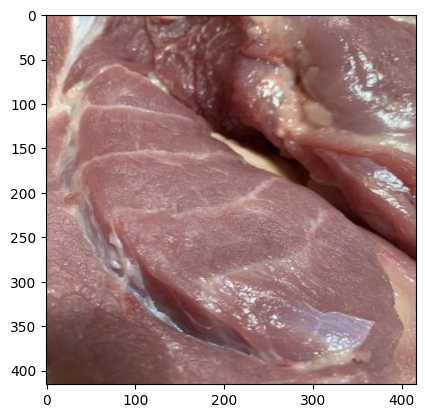

In [8]:
# Fresh 이미지 확인
showimg("/content/Meat Freshness.v1-new-dataset.multiclass/train/FRESH-122-_JPG.rf.48ea53d76ed7c89a866a770c784a719a.jpg")

### train 폴더 이미지

In [9]:
# 상위 디렉토리 명
file_loc = '/content/Meat Freshness.v1-new-dataset.multiclass/'

train_imgs = [fn for fn in os.listdir(file_loc+'/train') if fn.endswith('jpg')]

In [10]:
# 파일 이름 바꾸기
def fileRename(file_loc, filepath):
  a = filepath.split('_')
  os.rename(file_loc+filepath, file_loc+f'{a[0][:-1]}.jpg')

In [11]:
for filename in train_imgs:
  fileRename(file_loc+'train/', filename)

In [12]:
train_imgs_loc = [fn for fn in os.listdir(file_loc+'/train') if fn.endswith('jpg')]
train_imgs_loc[100]

'SPOILED-648.jpg'

In [13]:
fresh_imgs_loc = [fn for fn in os.listdir(file_loc+'/train') if fn.startswith('FRESH')]
half_fresh_imgs_loc = [fn for fn in os.listdir(file_loc+'/train') if fn.startswith('HALF-FRESH')]
spoiled_imgs_loc = [fn for fn in os.listdir(file_loc+'/train') if fn.startswith('SPOILED')]

### test 폴더 이미지

In [14]:
test_imgs = [fn for fn in os.listdir(file_loc+'/valid') if fn.endswith('jpg')]

In [15]:
for filename in test_imgs:
  fileRename(file_loc+'valid/', filename)

In [16]:
test_imgs_loc = [fn for fn in os.listdir(file_loc+'/valid') if fn.endswith('jpg')]
test_imgs_loc[100]

'HALF-FRESH-749.jpg'

In [17]:
test_fresh_imgs_loc = [fn for fn in os.listdir(file_loc+'/valid') if fn.startswith('FRESH')]
test_half_fresh_imgs_loc = [fn for fn in os.listdir(file_loc+'/valid') if fn.startswith('HALF-FRESH')]
test_spoiled_imgs_loc = [fn for fn in os.listdir(file_loc+'/valid') if fn.startswith('SPOILED')]

## **2.EDA**

In [18]:
from keras.utils import load_img, img_to_array

# 이미지를 Numpy array로 생성하기
def img2np(path, list_of_filename, size = (70, 70, 3)):
    for fn in list_of_filename:
        fp = path + fn
        current_image = load_img(fp, target_size = size)
        img_ts = img_to_array(current_image)
        try:
            full_mat = np.concatenate((full_mat, img_ts), axis = 0)
        except UnboundLocalError:
            full_mat = img_ts
    return full_mat.reshape(-1, 70, 70, 3)

fresh_imgs = img2np(f'{file_loc}/train/', fresh_imgs_loc)
half_fresh_imgs = img2np(f'{file_loc}/train/', half_fresh_imgs_loc)
spoiled_imgs = img2np(f'{file_loc}/train/', spoiled_imgs_loc)

In [19]:
test_fresh_imgs = img2np(f'{file_loc}/valid/', test_fresh_imgs_loc)
test_half_fresh_imgs = img2np(f'{file_loc}/valid/', test_half_fresh_imgs_loc)
test_spoiled_imgs = img2np(f'{file_loc}/valid/', test_spoiled_imgs_loc)

#### 각 label의 사진 개수는?

특정 데이터가 부족하다면 해당 데이터만을 인터넷에서 추가적으로 구해오고 더 좋은 퀄리티의 모델을 만들 수 있을 것으로 기대된다.

In [20]:
len(fresh_imgs_loc), len(half_fresh_imgs_loc), len(spoiled_imgs_loc)

(675, 630, 510)

전체적으로 굉장히 공평하게 분류되어 있어, 그 걱정은 하지 않아도 될 것 같다고 판단했다.

#### label 별 사진 예시를 살펴보자!

각각의 사진이 어떤 형식으로 저장되어 있는지 확인한다. 만약 다른 label에 대해 저장되어 있는 형태가 다르다면, 전처리 작업이 추가적으로 필요하기 때문에 꼭 필요한 작업이라고 사료된다.

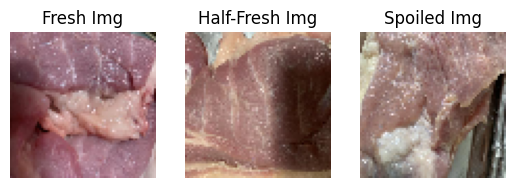

In [21]:
plt.subplot(1,3,1)
plt.imshow(fresh_imgs[0].astype(int), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Fresh Img')

plt.subplot(1,3,2)
plt.imshow(half_fresh_imgs[0].astype(int), vmin = 0, vmax = 255)
plt.title('Half-Fresh Img')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(spoiled_imgs[0].astype(int), vmin = 0, vmax = 255)
plt.title('Spoiled Img')
plt.axis('off')

plt.show()

예시는 전부 고기를 클로즈업 해서 찍은 사진으로 보인다. 다행이게도, 3개의 label별로 차이가 보이지 않아 그대로 학습에 사용할 것이다.

#### 각 label별 pixel에 대한 평균 색과 밝기는?

픽셀의 평균값을 계산하는 이유는 EDA의 측면도 있지만, 결측치(고기보다 바닥의 사진이 더 많이 나왔다던가)를 확인하기 위함도 있다. 해당 작업은 그 바로 아래 단원에서 픽셀의 값이 평균으로부터 지나치게 멀리 떨어져있는 사진이 있는지 확인한다.

In [22]:
def generateImg(matrix, title=' ', size = (5,5)):
  matrix = matrix.astype(int)
  plt.figure(figsize = size)
  plt.imshow(matrix, vmin = 0, vmax = 255)
  plt.title(title)
  plt.axis('off')
  plt.show()

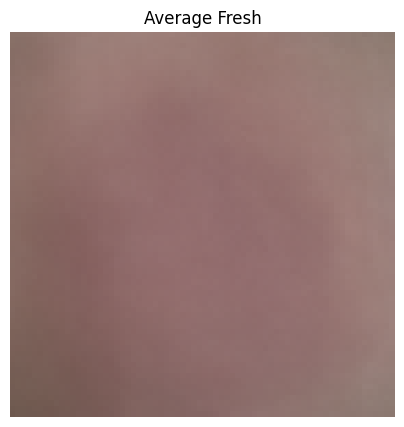

(0.565923169267707, 0.4387883153261305, 0.42485874349739894) 0.47652340936374543


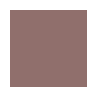

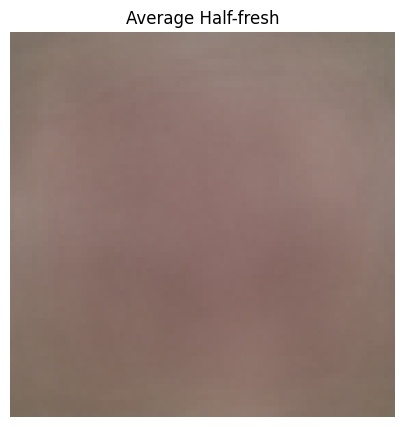

(0.5456830732292918, 0.45025610244097636, 0.41957422969187674) 0.47183780178738166


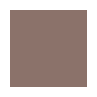

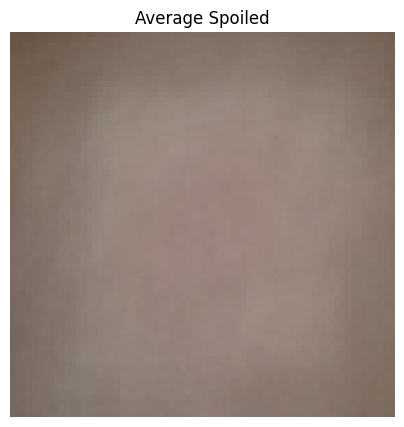

(0.5523265306122449, 0.48339255702280914, 0.4459503801520608) 0.49388982259570496


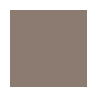

In [23]:
def find_mean_img(full_mat, title, size = (70, 70, 3)):
    # 이미지들의 평균 구하기
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = np.asarray(mean_img, dtype = int)

    # 픽셀별 평균
    generateImg(mean_img, f'Average {title}')

    # 전체 평균과 밝기
    mean_color = tuple(np.mean(mean_img, axis = (0,1))/255)
    print(mean_color, sum(mean_color)/3)
    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow([[mean_color]])
    plt.show()
    return mean_img

fresh_mean = find_mean_img(fresh_imgs, 'Fresh')
half_fresh_mean = find_mean_img(half_fresh_imgs, 'Half-fresh')
spoiled_mean = find_mean_img(spoiled_imgs, 'Spoiled')

어느 정도 눈에 띄는 차이가 보이는 것 같다. 평균적인 색에 Fresh 할 수록 더 불그스름한것 같다. 하지만 이를 표로 나타내서 보고 싶은데...

#### 색의 분포 확인하기 (심화)

이미지 색상이 어떤 형식으로 분포되어 있는지 알아볼 것이다!

RGB : (137.95938, 116.58061, 107.03204)


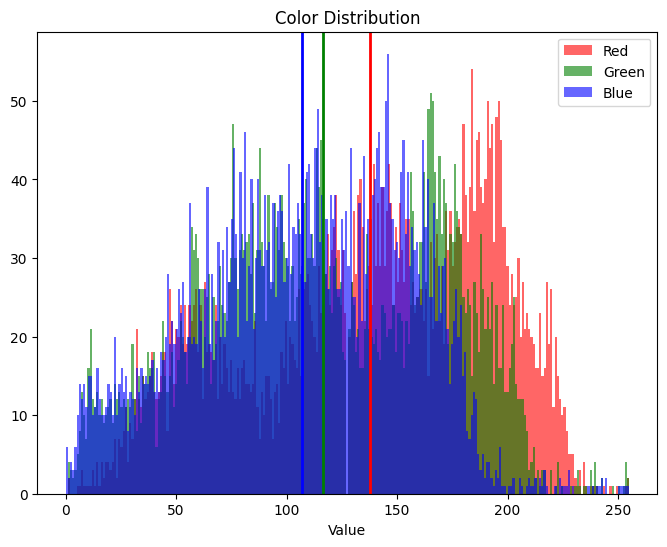

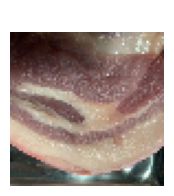

In [24]:
# 이미지 색상이 RGB 값에 따라서 어떻게 분포되어 있는가?

def colorDistribution(matrix, title = 'Color Distribution', ImgShow = True, Average = True):
  dim = len(matrix.shape)
  # 색상 저장하기
  if dim == 3 : # matrix = 사진 한 장
    red = matrix[:,:,0].flatten()
    green = matrix[:,:,1].flatten()
    blue = matrix[:,:,2].flatten()
  elif dim == 4 : # matrix = 사진 뭉텅이
    red = matrix[:,:,:,0].flatten()
    green = matrix[:,:,:,1].flatten()
    blue = matrix[:,:,:,2].flatten()
  else :
    raise Exception(f"Weird Dimension : {dim} dimension")

  # 표 생성
  plt.figure(figsize= (8,6))
  plt.hist(red, bins = 256, color = 'red', label = 'Red', alpha = 0.6)
  plt.hist(green, bins = 256, color = 'green', label = 'Green', alpha = 0.6)
  plt.hist(blue, bins = 256, color = 'blue', label = 'Blue', alpha = 0.6)
  if Average == True:
    plt.axvline(np.mean(red), color = 'red', linewidth = 2)
    plt.axvline(np.mean(blue), color = 'blue', linewidth = 2)
    plt.axvline(np.mean(green), color = 'green', linewidth = 2)
    print(f'RGB : {np.mean(red), np.mean(green), np.mean(blue)}')
  plt.xlabel('Value')
  plt.title(title)
  plt.legend()
  plt.show()

  # 이미지도 보여주기
  if dim == 3 and ImgShow == True:
    generateImg(matrix, size = (2,2))

colorDistribution(fresh_imgs[10])

예시 사진 한 장에 대해서 색 분포를 살펴보면 다음과 같다. 아무래도 Fresh한 Meat니, 붉은 색 계열의 밝기가 눈에 띄게 큰 것 같다.

RGB : (144.81242, 112.39285, 108.84321)


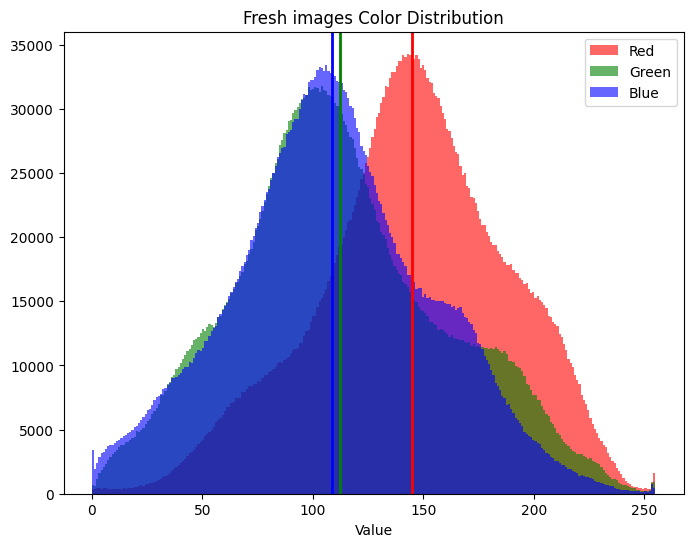

In [25]:
colorDistribution(fresh_imgs, title = 'Fresh images Color Distribution')

Fresh 한 meat의 경우, 파란색 분포와 초록색 분포가 별 차이가 없고, 붉은색이 세게 나타난다.

RGB : (139.6483, 115.316765, 107.48528)


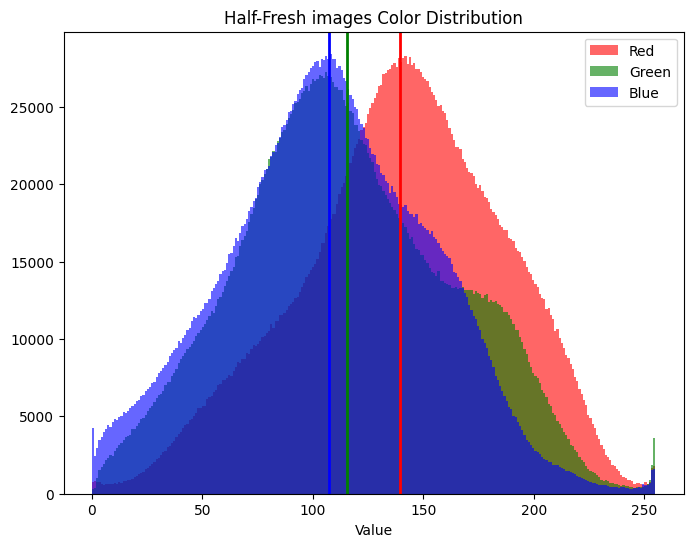

In [26]:
colorDistribution(half_fresh_imgs, title = 'Half-Fresh images Color Distribution')

HALF-Fresh의 경우 초록색의 평균값이 증가했으며,

RGB : (141.34392, 123.763, 114.21984)


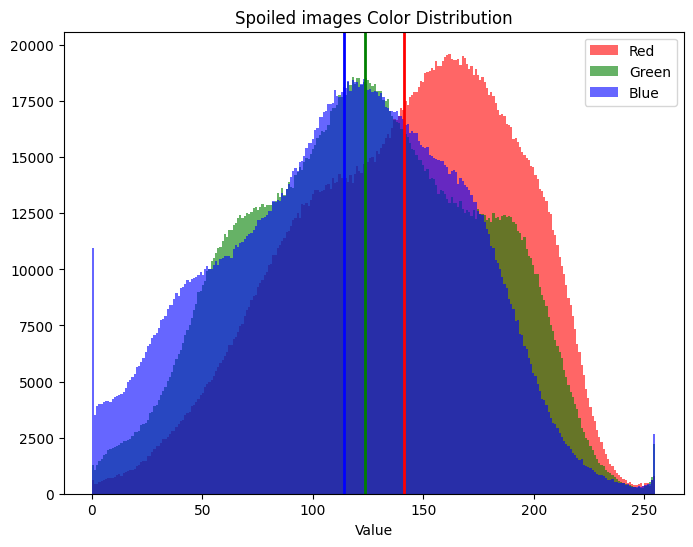

In [27]:
colorDistribution(spoiled_imgs, title = 'Spoiled images Color Distribution')

Spoiled의 경우 초록색이 더욱 많이 보인다.

표 3개를 비교해보면 그 차이를 볼 수 있다. Half-Fresh와 Spoiled 사이에서는 Green의 밝기가 크게 증가한 것이 눈에 띈다. 전체적으로 예쁜 종 모양을 띄고 있는 것을 확인했고, 학습에 적합하다고 생각하다.

#### 이미지 사이즈 분포

어짜피 학습을 진행할 때 크기가 70,70으로 일정해지지만 그럼에도 해당 작업을 진행하는 이유는 지나치게 가로와 세로가 긴 데이터가 있으면 고기의 모양이 왜곡될 수 있기 때문이다. 사이즈가 왜곡된 사진이 있는지 확인해보는 작업이다.

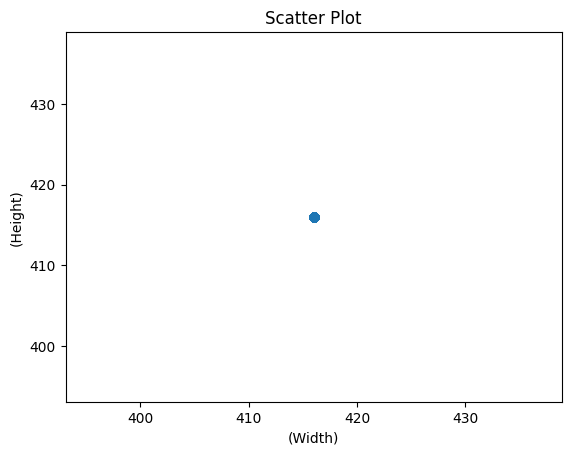

In [28]:
from PIL import Image

file_size = []
for filepath in train_imgs_loc:
  image_path = file_loc+'train/'+filepath

  img = Image.open(image_path)
  file_size.append(img.size)

x, y = zip(*file_size)
plt.scatter(x, y)
plt.xlabel("(Width)")
plt.ylabel("(Height)")
plt.title("Scatter Plot")
plt.show()

이럴수가! 모든 사진의 크기가 같은 것 같다.

In [29]:
image_path = file_loc+'train/'+train_imgs_loc[0]

img = Image.open(image_path)
img.size

(416, 416)

모든 사진의 사이즈가 (416,416) 인 것 같다.

## **3.데이터 전처리**

### Outlier 제거

#### 고기가 중심이 아니라, 배경이 중심인 사진이 있을지 검색해보자! (색을 중심으로)

평균으로부터 얼마나 멀리 떨어져 있는지 일부 사진들을 살펴보며 진행하도록 하자.

In [30]:
# MSE를 통해서 평균으로부터 가장 멀리 떨어져있는 사진이 무엇인지 판단하기
def findingOutlier(full_mat, comparison, num = 10):
  different_imgs = []
  full_mat = np.array(full_mat)
  for i in range(full_mat.shape[0]):
    mse = ((full_mat[i] - comparison) ** 2).mean()
    different_imgs.append((i, mse))

  different_imgs.sort(key = lambda x: x[1], reverse = True)

  top_imgs = different_imgs[:num]

  index = list()

  for i, mse in top_imgs:
    generateImg(full_mat[i].astype(int))
    print(i, mse)
    index.append(i)

  return index

# Index를 받으면 해당 사진을 삭제하기
def delOutlier(full_mat, delIndex):
  full_mat = np.delete(full_mat, delIndex, axis = 0)
  return full_mat

##### fresh_imgs

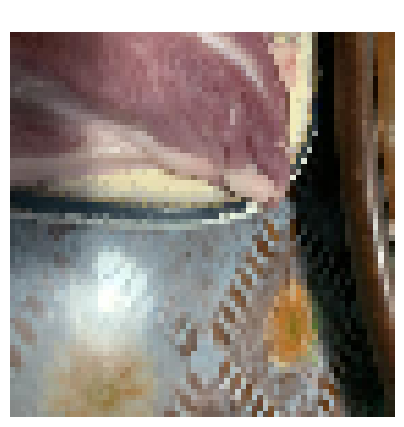

511 4125.932789115646


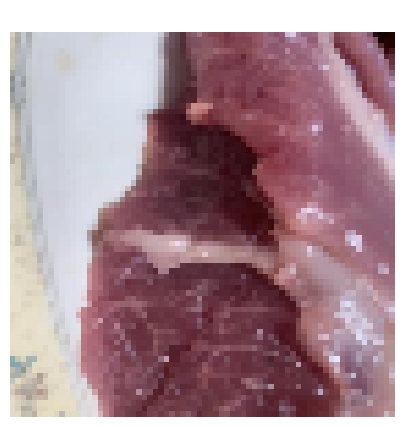

89 4074.944217687075


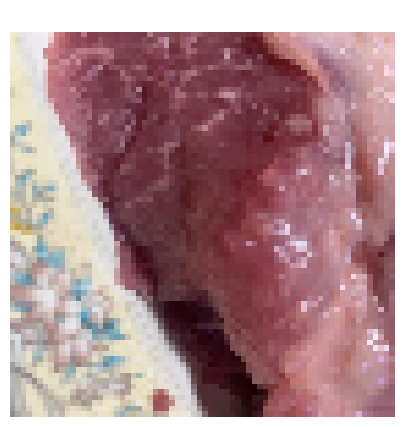

93 3867.4586394557823


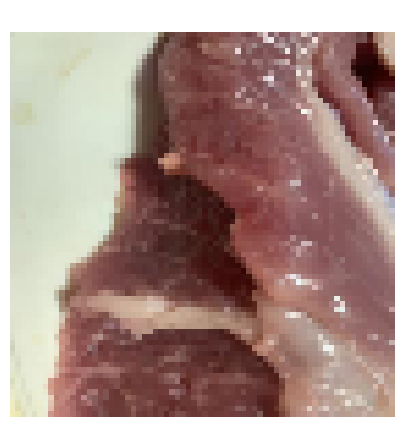

189 3823.2521088435374


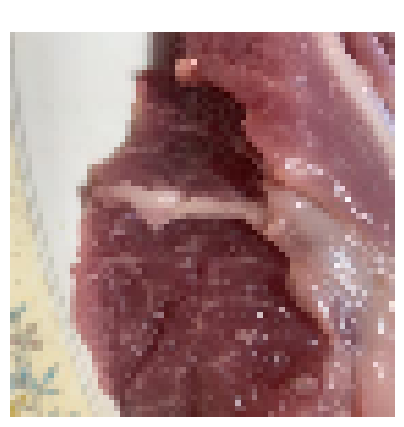

23 3805.103469387755


In [31]:
outlier = findingOutlier(fresh_imgs, fresh_mean, 5)

데이터가 전체적으로 나쁘지는 않지만, 첫 번째 것은 좀 심한듯. 전체 중에서 70% 정도가 고기가 아니다? 해당 사진은 데이터에서 제거하는 것이 좋아 보인다.

In [32]:
fresh_imgs = delOutlier(fresh_imgs, outlier[0])

##### half-fresh_images

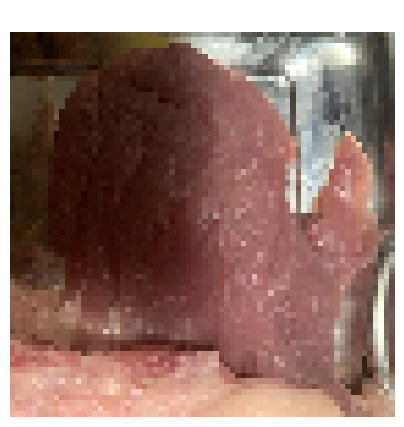

252 3672.836870748299


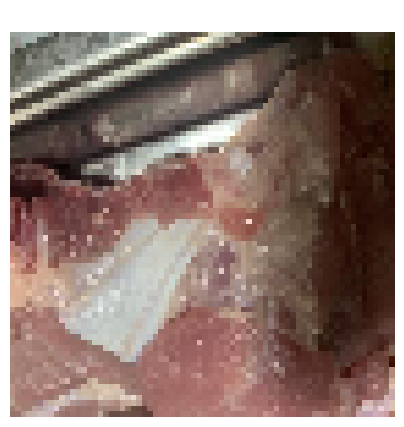

602 3598.924353741497


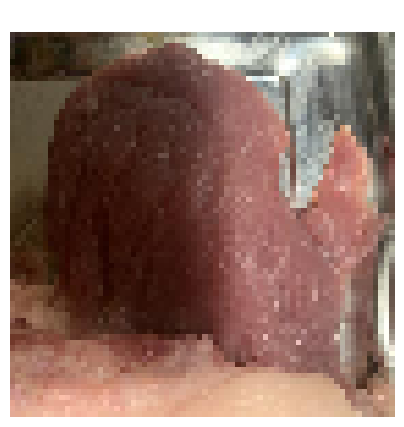

178 3578.3479591836735


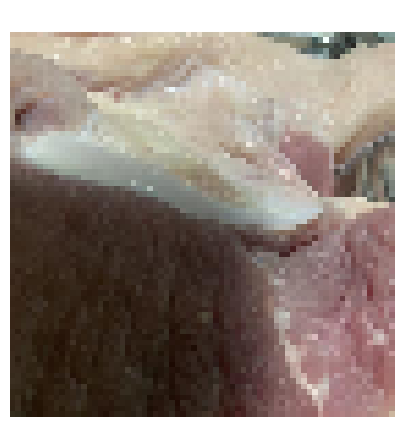

265 3554.255782312925


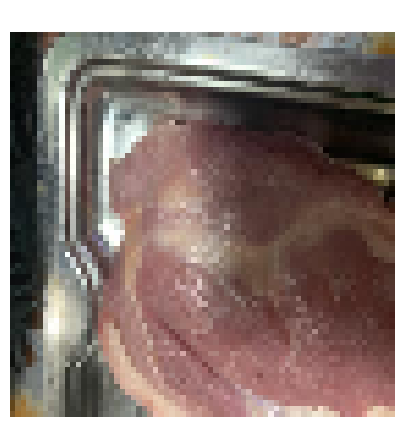

470 3485.5436734693876


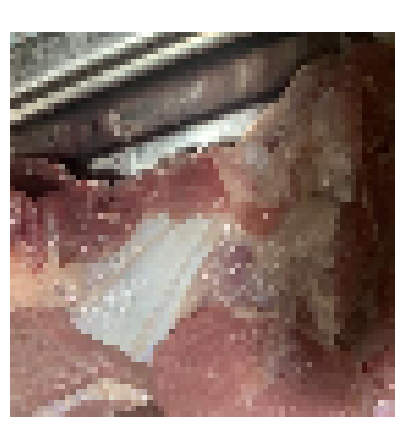

455 3449.5780272108846


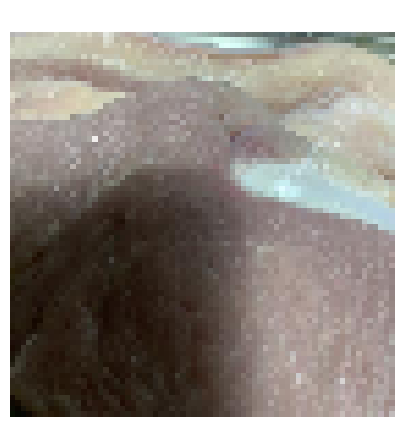

175 3386.439387755102


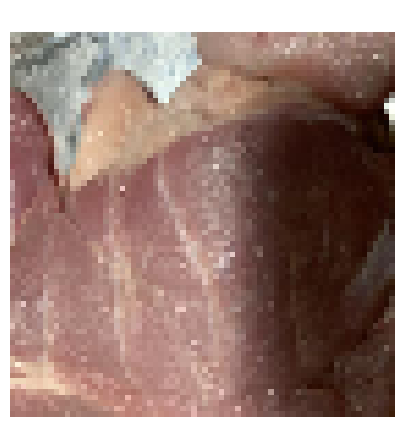

424 3376.934013605442


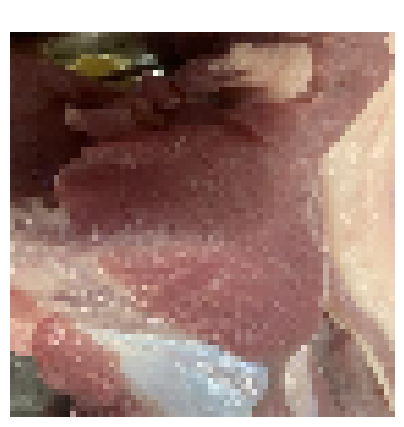

472 3315.695714285714


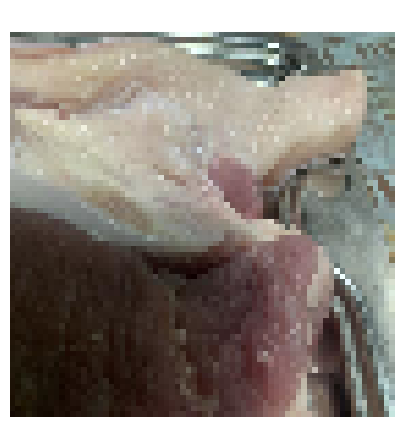

297 3298.3072789115645


[252, 602, 178, 265, 470, 455, 175, 424, 472, 297]

In [33]:
findingOutlier(half_fresh_imgs, half_fresh_mean)

그럭저럭 나쁘지 않은 것 같다.

##### spoiled_imgs

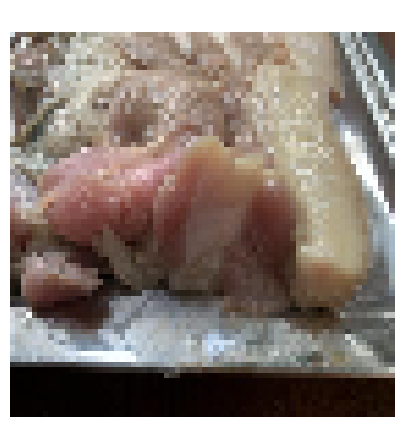

82 4133.641768707483


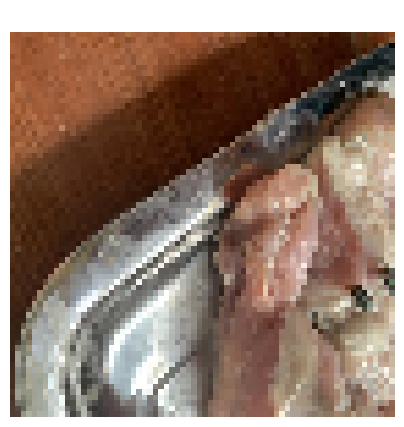

178 3894.7768027210886


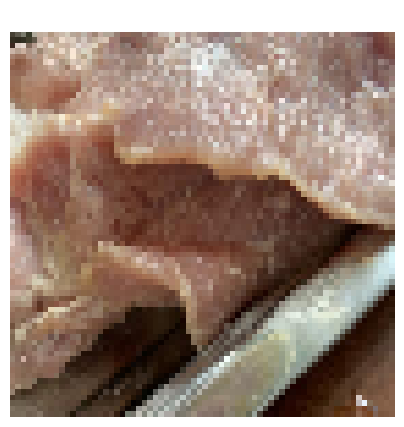

444 3530.3714285714286


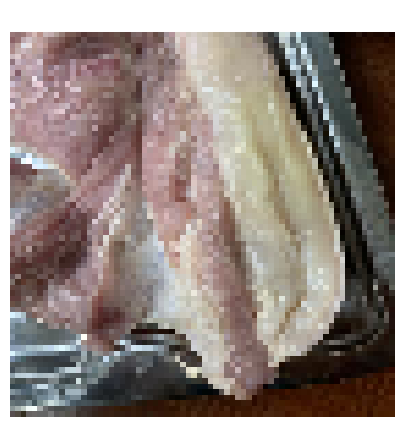

278 3448.4725170068027


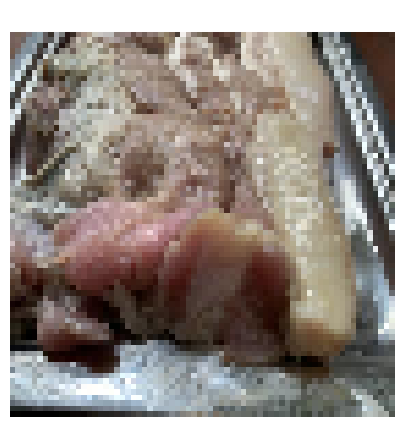

292 3395.190612244898


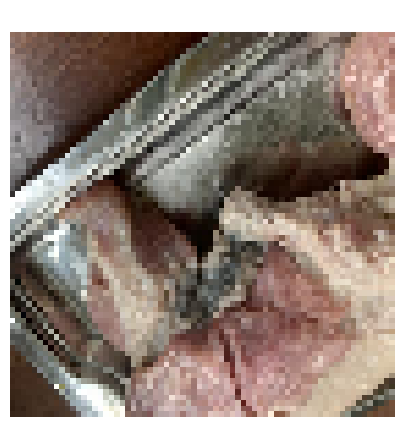

186 3390.0951020408165


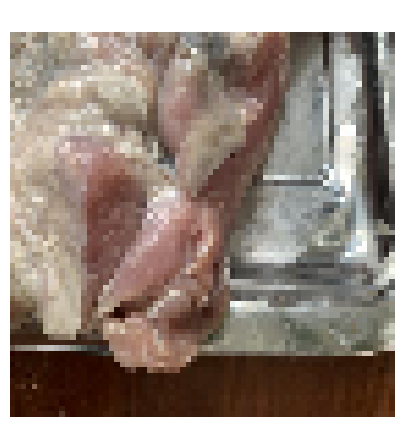

246 3388.0485034013604


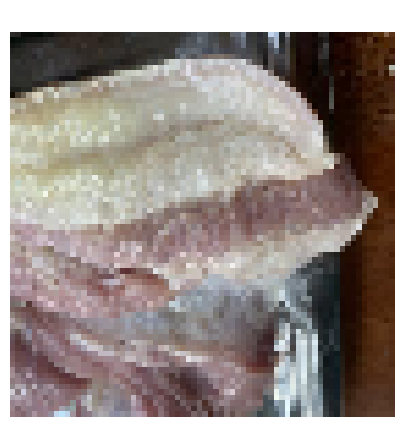

386 3364.9978231292516


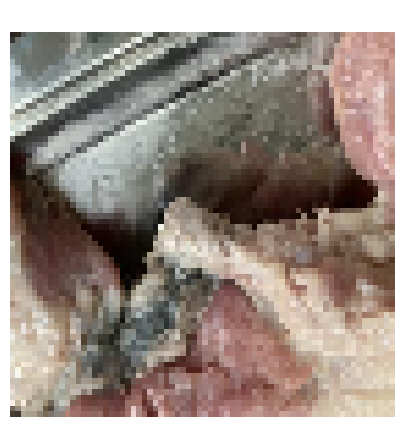

305 3361.077006802721


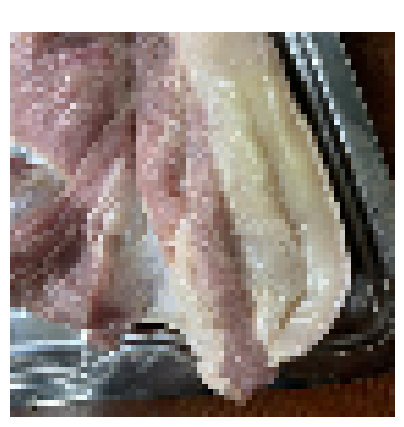

43 3336.267006802721


In [34]:
outlier2 = findingOutlier(spoiled_imgs, spoiled_mean)

두 번째 사진은 제거하는 것이 좋아보인다

In [35]:
spoiled_imgs = delOutlier(spoiled_imgs, outlier2[1])

### ImageGenerator

#### train 파일

In [36]:
datagen = ImageDataGenerator(
    rescale = 1/255
)

In [37]:
# label 형성
fresh_labels = np.zeros(fresh_imgs.shape[0])
half_fresh_labels = np.ones(half_fresh_imgs.shape[0])
spoiled_labels = 2*np.ones(spoiled_imgs.shape[0])

In [38]:
# label과 데이터 합치기
train_data = np.concatenate((fresh_imgs, half_fresh_imgs, spoiled_imgs), axis=0)
train_labels = np.concatenate((fresh_labels, half_fresh_labels, spoiled_labels), axis=0)

# label과 데이터 섞기
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
train_data = train_data[indices]
train_labels = train_labels[indices]

In [39]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

train_labels[:30]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [40]:
train_generator = datagen.flow(train_data, train_labels, batch_size = 32)

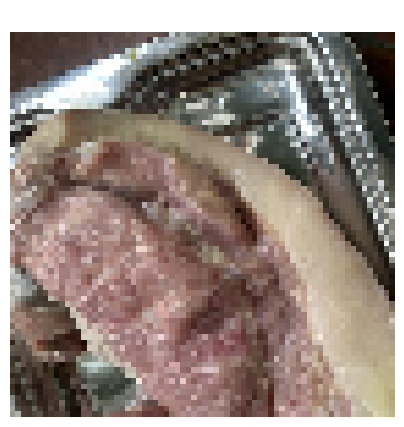

Image shape: (70, 70, 3)
Label: [0. 0. 1.]


In [41]:
batch_data, batch_labels = next(train_generator)

# 사진 한 장 보기
sample_image = batch_data[19]
sample_label = batch_labels[19]


generateImg(sample_image*255)
print("Image shape:", sample_image.shape)
print("Label:", sample_label)

#### test 파일

In [42]:
test_fresh_labels = np.zeros(test_fresh_imgs.shape[0])
test_half_fresh_labels = np.ones(test_half_fresh_imgs.shape[0])
test_spoiled_labels = 2* np.ones(test_spoiled_imgs.shape[0])

In [43]:
# label과 데이터 합치기
test_data = np.concatenate((test_fresh_imgs, test_half_fresh_imgs, test_spoiled_imgs), axis=0)
test_labels = np.concatenate((test_fresh_labels, test_half_fresh_labels, test_spoiled_labels), axis=0)

# label과 데이터 섞기
test_indices = np.arange(test_data.shape[0])
np.random.shuffle(test_indices)
test_data = test_data[test_indices]
test_labels = test_labels[test_indices]

In [44]:
# categorial로 바꾸기
test_labels = to_categorical(test_labels)

In [45]:
test_generator = datagen.flow(test_data, test_labels, batch_size = 32)

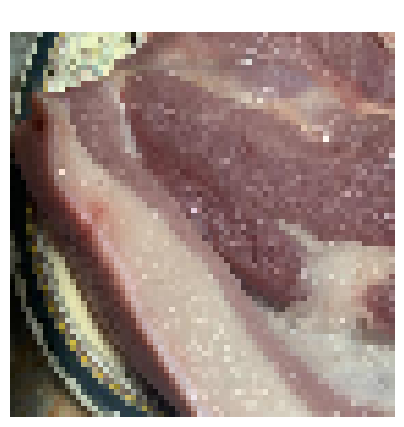

Image shape: (70, 70, 3)
Label: [1. 0. 0.]


In [46]:
test_batch_data, test_batch_labels = next(test_generator)

# 사진 한 장 보기
sample_image = test_batch_data[19]
sample_label = test_batch_labels[19]


generateImg(sample_image*255)
print("Image shape:", sample_image.shape)
print("Label:", sample_label)

## **4.모델 학습 및 평가 - 이미지 증강 전**

    - CNN 모델 정의 및 학습
    - 모델의 과적합 여부 그래프 등으로 확인하기
    - test 데이터 기반 모델 평가

In [47]:
!pip install scikeras

In [48]:
# 셀별로 어떤 처리를 했는지 주석을 달아주세요.
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
import random
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model

### 1-1. 가장 기본적인 CNN (Dropout)

In [ ]:
#모델 만들기
model1 = Sequential()

model1.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70, 70, 3)))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPool2D(2,2))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(128, activation="relu"))

model1.add(Dropout(0.25))
model1.add(Dense(3, 'softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [ ]:
from keras.optimizers import Adam

model1.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history1 =  model1.fit(train_generator,
                     epochs=50,
                     verbose=1,
                     validation_data = test_generator)
                     #callbacks=[custom_early_stopping])

Epoch 1/50
57/57 [==============================] - 14s 26ms/step - loss: 1.0527 - accuracy: 0.4269 - val_loss: 0.9021 - val_accuracy: 0.5322
Epoch 2/50
57/57 [==============================] - 1s 13ms/step - loss: 0.6945 - accuracy: 0.6933 - val_loss: 0.6298 - val_accuracy: 0.6829
Epoch 3/50
57/57 [==============================] - 1s 13ms/step - loss: 0.5330 - accuracy: 0.7772 - val_loss: 0.5324 - val_accuracy: 0.7561
Epoch 4/50
57/57 [==============================] - 1s 13ms/step - loss: 0.4014 - accuracy: 0.8351 - val_loss: 0.4190 - val_accuracy: 0.8603
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.2635 - accuracy: 0.9013 - val_loss: 0.3838 - val_accuracy: 0.8603
Epoch 6/50
57/57 [==============================] - 1s 16ms/step - loss: 0.1909 - accuracy: 0.9322 - val_loss: 0.2672 - val_accuracy: 0.9224
Epoch 7/50
57/57 [==============================] - 1s 15ms/step - loss: 0.1173 - accuracy: 0.9608 - val_loss: 0.3229 - val_accuracy: 0.8803
Epoch 8/50
5

In [ ]:
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model '+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

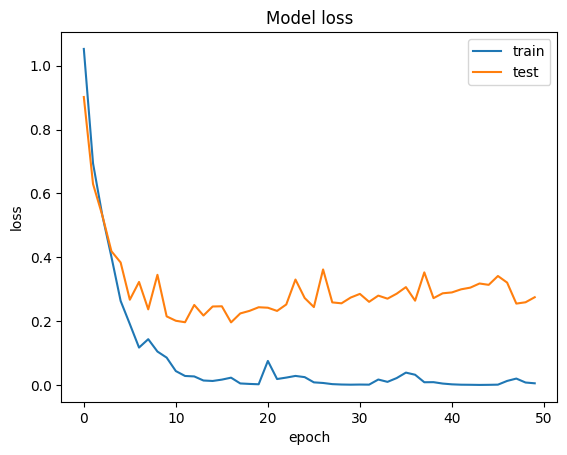

In [ ]:
#과적합 확인
modelplot(history1, 'loss', 'val_loss')

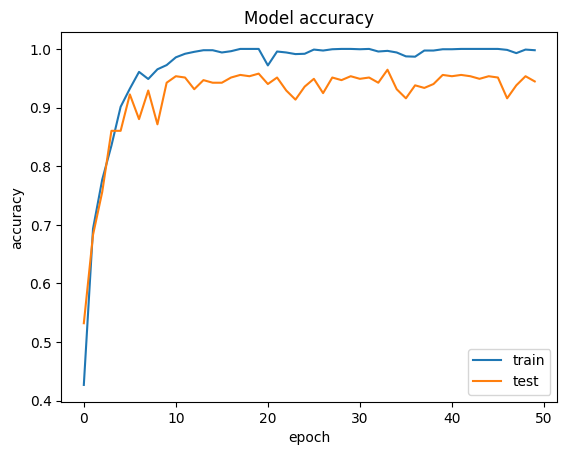

In [ ]:
modelplot(history1, 'accuracy', 'val_accuracy')

In [ ]:
# model.evaluate로 평가하기
score = model1.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 6ms/step - loss: 0.2750 - accuracy: 0.9446
Test loss: 0.27501994371414185
Test accuracy: 0.9445676207542419


과적합이 전체적으로 눈에 띄는 기본 모델이었다.

0.2750, 94.46%의 정확도를 보여주었다.

### 1-2. + EarlyStopping + ModelCheckpoint

In [ ]:
# patience만큼 성능이 계속해서 안좋아진다면 멈추기
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 30,
    restore_best_weights = False
)

# 가장 좋은 성능의 모델을 저장하기
model_checkpoint = ModelCheckpoint(
    filepath = 'model2_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
# 모델 만들기
model2 = Sequential()

model2.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70, 70, 3)))
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(64, (3,3), activation = 'relu'))
model2.add(MaxPool2D(2,2))

model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(128, activation="relu"))

model2.add(Dropout(0.25))
model2.add(Dense(3, 'softmax'))

In [ ]:
model2.summary()

Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_471 (Conv2D)         (None, 68, 68, 64)        1792      
                                                                 
 max_pooling2d_314 (MaxPool  (None, 34, 34, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_472 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_315 (MaxPool  (None, 16, 16, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_314 (Dropout)       (None, 16, 16, 64)        0         
                                                                 
 flatten_157 (Flatten)       (None, 16384)          

In [ ]:
model2.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history2 =  model2.fit(train_generator,
                     epochs=50,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/50
57/57 [==============================] - 3s 23ms/step - loss: 0.9357 - accuracy: 0.5587 - val_loss: 0.7864 - val_accuracy: 0.6386
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 0.5978 - accuracy: 0.7529 - val_loss: 0.5302 - val_accuracy: 0.7849
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 0.4665 - accuracy: 0.8069 - val_loss: 0.4249 - val_accuracy: 0.8404
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.3405 - accuracy: 0.8616 - val_loss: 0.4313 - val_accuracy: 0.8359
Epoch 5/50
57/57 [==============================] - 1s 15ms/step - loss: 0.2469 - accuracy: 0.9079 - val_loss: 0.2890 - val_accuracy: 0.9024
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.1569 - accuracy: 0.9404 - val_loss: 0.3043 - val_accuracy: 0.8825
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.1320 - accuracy: 0.9487 - val_loss: 0.2498 - val_accuracy: 0.9246
Epoch 8/50
57

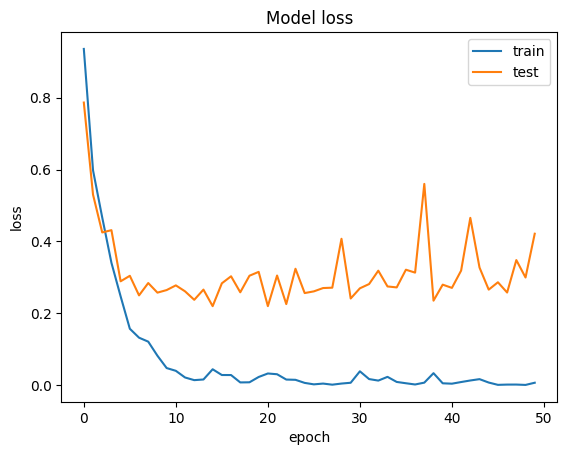

In [ ]:
#과적합 확인
modelplot(history2, 'loss', 'val_loss')

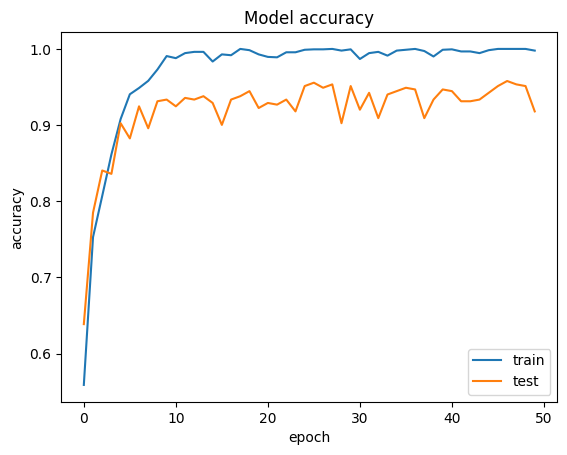

In [ ]:
#과적합 확인
modelplot(history2, 'accuracy', 'val_accuracy')

In [ ]:
# model2.evaluate로 평가하기
score = model2.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 8ms/step - loss: 0.4214 - accuracy: 0.9180
Test loss: 0.42138001322746277
Test accuracy: 0.9179601073265076


In [ ]:
best_model2 = load_model('model2_best_model.h5')
score = best_model2.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 6ms/step - loss: 0.2577 - accuracy: 0.9579
Test loss: 0.25772401690483093
Test accuracy: 0.9578713774681091


ModelCheckpoint로 살펴본 모델

0.2577, 0.9579%

### 1-3. + GridSearchCV (하이퍼파라미터 찾기)

activation function, dropoutRate 2개, 그리고 맨 마지막 fully connected layer의 unit 개수를 GridSearchCV를 통해서 돌려본다.

In [49]:
#this code is from my Classmate : accuracy랑 loss 한 번에 보기

def modelplot2(history):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train')
  plt.plot(history.history['val_accuracy'], label='Validation')
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')


  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

#### parameter 찾기

In [ ]:
def build_model(dropoutRate1, dropoutRate2, units):
  model3 = Sequential()
  model3.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
  model3.add(MaxPool2D(2,2))

  model3.add(Conv2D(64, (3,3), activation = 'relu'))
  model3.add(MaxPool2D(2,2))

  model3.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

  model3.add(Dropout(dropoutRate1))

  model3.add(Flatten())

  model3.add(Dense(units, activation = 'relu'))

  model3.add(Dropout(dropoutRate2))
  model3.add(Dense(3, 'softmax'))
  model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model3


In [ ]:
model3 = KerasClassifier(build_fn = build_model, dropoutRate1 = 0, dropoutRate2 = 0, units = 32)

In [ ]:
parameters = {'dropoutRate1' : [0, 0.05, 0.1, 0.15, 0.2, 0.25],
              'dropoutRate2' : [0, 0.1, 0.2, 0.3],
              'units' : [32, 64, 128]}

In [ ]:
# 최적의 파라미터 찾기
grid_search1 = GridSearchCV(estimator = model3,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 2,
                            verbose = 1)

In [ ]:
grid_result = grid_search1.fit(train_data, train_labels)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 3s 14ms/step - loss: 3.4729 - accuracy: 0.4550


In [ ]:
# 가장 우수한 파라미터
grid_result.best_params_

{'dropoutRate1': 0.05, 'dropoutRate2': 0.1, 'units': 64}

In [ ]:
#10등까지 보기
results = pd.DataFrame(grid_result.cv_results_)
results = results[['param_dropoutRate1', 'param_dropoutRate2', 'param_units', 'rank_test_score']]

results.sort_values(by = 'rank_test_score', ascending = True).head(10)

,param_dropoutRate1,param_dropoutRate2,param_units,rank_test_score
16,0.05,0.1,64,1
23,0.05,0.3,128,2
14,0.05,0,128,3
2,0,0,128,4
56,0.2,0.2,128,5
31,0.1,0.2,64,6
44,0.15,0.2,128,7
65,0.25,0.1,128,8
50,0.2,0,128,9
68,0.25,0.2,128,10


#### 해당 parameter을 통해 돌려보기 (혹시 모르니 5등까지는 모두 돌려보자)

##### 1등 (0.05, 0.1, 64)

In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 30,
    restore_best_weights = False
)

model_checkpoint = ModelCheckpoint(
    filepath = 'model3_1_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model3_1 = Sequential()

model3_1.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_1.add(MaxPool2D(2,2))

model3_1.add(Conv2D(64, (3,3), activation = 'relu'))
model3_1.add(MaxPool2D(2,2))

model3_1.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_1.add(Dropout(0.05))

model3_1.add(Flatten())

model3_1.add(Dense(64, activation = 'relu'))

model3_1.add(Dropout(0.1))
model3_1.add(Dense(3, 'softmax'))

model3_1.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history3_1 =  model3_1.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 2s 18ms/step - loss: 0.9269 - accuracy: 0.5179 - val_loss: 0.6792 - val_accuracy: 0.6718
Epoch 2/150
57/57 [==============================] - 1s 14ms/step - loss: 0.5732 - accuracy: 0.7534 - val_loss: 0.5214 - val_accuracy: 0.7849
Epoch 3/150
57/57 [==============================] - 1s 14ms/step - loss: 0.4924 - accuracy: 0.7882 - val_loss: 0.4425 - val_accuracy: 0.8137
Epoch 4/150
57/57 [==============================] - 1s 15ms/step - loss: 0.3735 - accuracy: 0.8467 - val_loss: 0.4211 - val_accuracy: 0.8337
Epoch 5/150
57/57 [==============================] - 1s 14ms/step - loss: 0.2837 - accuracy: 0.8908 - val_loss: 0.3267 - val_accuracy: 0.8758
Epoch 6/150
57/57 [==============================] - 1s 14ms/step - loss: 0.2749 - accuracy: 0.8941 - val_loss: 0.2762 - val_accuracy: 0.9091
Epoch 7/150
57/57 [==============================] - 1s 14ms/step - loss: 0.1670 - accuracy: 0.9437 - val_loss: 0.3326 - val_accuracy: 0.8714
Epoch 

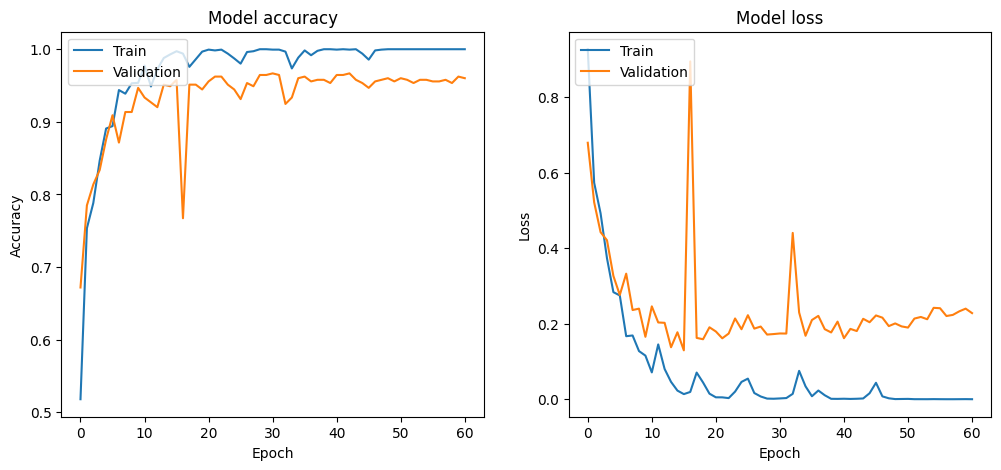

15/15 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9667
Test loss: 0.17424064874649048
Test accuracy: 0.9667405486106873


In [ ]:
modelplot2(history3_1)

best_model3_1 = load_model('model3_1_best_model.h5')
score = best_model3_1.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 2등 (0.05, 0.3, 128)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model3_2_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model3_2 = Sequential()

model3_2.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_2.add(MaxPool2D(2,2))

model3_2.add(Conv2D(64, (3,3), activation = 'relu'))
model3_2.add(MaxPool2D(2,2))

model3_2.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_2.add(Dropout(0.05))

model3_2.add(Flatten())

model3_2.add(Dense(128, activation = 'relu'))

model3_2.add(Dropout(0.3))
model3_2.add(Dense(3, 'softmax'))

model3_2.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history3_2 =  model3_2.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 3s 20ms/step - loss: 0.9475 - accuracy: 0.5108 - val_loss: 0.7710 - val_accuracy: 0.6541
Epoch 2/150
57/57 [==============================] - 1s 14ms/step - loss: 0.6101 - accuracy: 0.7192 - val_loss: 0.5761 - val_accuracy: 0.7339
Epoch 3/150
57/57 [==============================] - 1s 15ms/step - loss: 0.4542 - accuracy: 0.8152 - val_loss: 0.4994 - val_accuracy: 0.7938
Epoch 4/150
57/57 [==============================] - 1s 14ms/step - loss: 0.3563 - accuracy: 0.8616 - val_loss: 0.5419 - val_accuracy: 0.7627
Epoch 5/150
57/57 [==============================] - 1s 15ms/step - loss: 0.2819 - accuracy: 0.8946 - val_loss: 0.3911 - val_accuracy: 0.8404
Epoch 6/150
57/57 [==============================] - 1s 17ms/step - loss: 0.2362 - accuracy: 0.9024 - val_loss: 0.3279 - val_accuracy: 0.8647
Epoch 7/150
57/57 [==============================] - 1s 20ms/step - loss: 0.1725 - accuracy: 0.9399 - val_loss: 0.3536 - val_accuracy: 0.8780
Epoch 

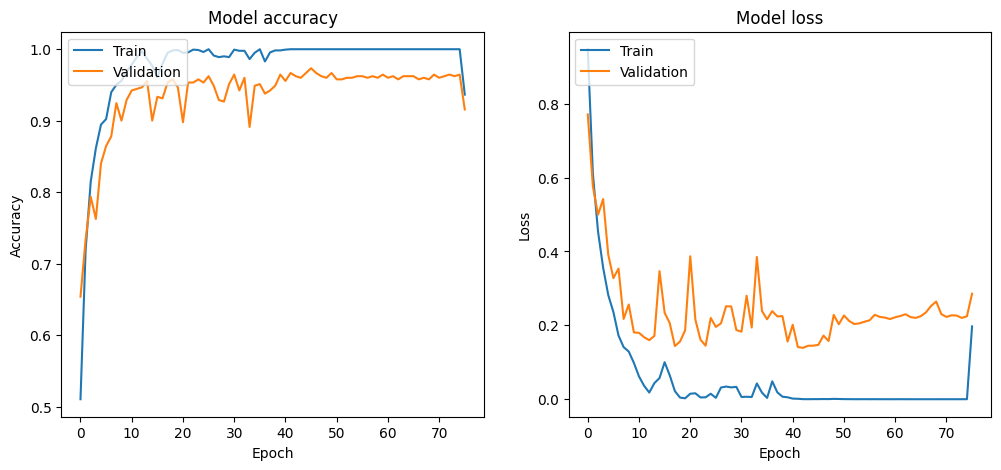

15/15 [==============================] - 0s 6ms/step - loss: 0.1471 - accuracy: 0.9734
Test loss: 0.147101029753685
Test accuracy: 0.9733924865722656


In [ ]:
modelplot2(history3_2)

best_model3_2 = load_model('model3_2_best_model.h5')
score = best_model3_2.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 3등 (0.05, 0, 128)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model3_3_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model3_3 = Sequential()

model3_3.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_3.add(MaxPool2D(2,2))

model3_3.add(Conv2D(64, (3,3), activation = 'relu'))
model3_3.add(MaxPool2D(2,2))

model3_3.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_3.add(Dropout(0.05))

model3_3.add(Flatten())

model3_3.add(Dense(128, activation = 'relu'))

model3_3.add(Dropout(0))
model3_3.add(Dense(3, 'softmax'))

model3_3.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history3_3 =  model3_3.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 2s 18ms/step - loss: 1.0203 - accuracy: 0.4804 - val_loss: 0.8405 - val_accuracy: 0.6009
Epoch 2/150
57/57 [==============================] - 1s 19ms/step - loss: 0.6866 - accuracy: 0.6718 - val_loss: 0.6497 - val_accuracy: 0.7406
Epoch 3/150
57/57 [==============================] - 1s 19ms/step - loss: 0.5528 - accuracy: 0.7479 - val_loss: 0.5143 - val_accuracy: 0.7561
Epoch 4/150
57/57 [==============================] - 1s 18ms/step - loss: 0.3976 - accuracy: 0.8207 - val_loss: 0.5235 - val_accuracy: 0.7849
Epoch 5/150
57/57 [==============================] - 1s 14ms/step - loss: 0.3072 - accuracy: 0.8764 - val_loss: 0.4022 - val_accuracy: 0.8537
Epoch 6/150
57/57 [==============================] - 1s 14ms/step - loss: 0.2049 - accuracy: 0.9255 - val_loss: 0.3490 - val_accuracy: 0.8647
Epoch 7/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1722 - accuracy: 0.9421 - val_loss: 0.2580 - val_accuracy: 0.9091
Epoch 

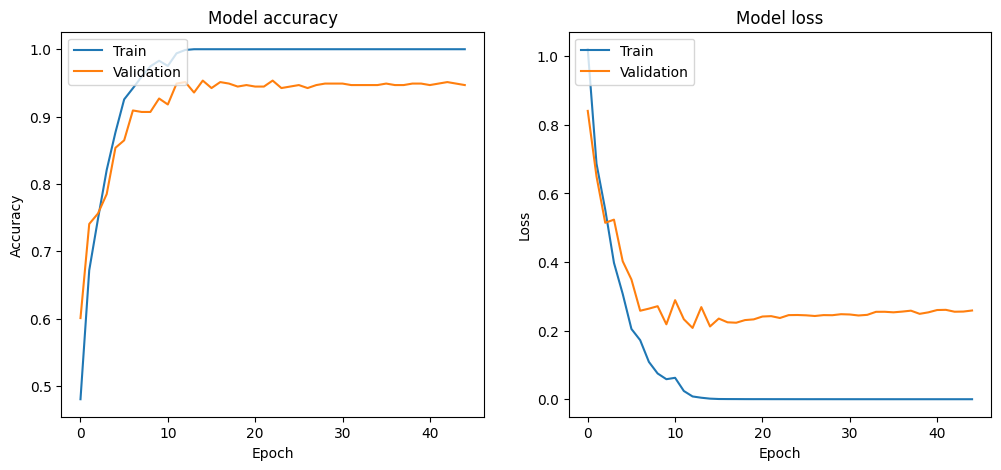

15/15 [==============================] - 0s 9ms/step - loss: 0.2122 - accuracy: 0.9534
Test loss: 0.21217074990272522
Test accuracy: 0.9534367918968201


In [ ]:
modelplot2(history3_3)

best_model3_3 = load_model('model3_3_best_model.h5')
score = best_model3_3.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 4등 (0, 0, 128)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model3_4_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model3_4 = Sequential()

model3_4.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_4.add(MaxPool2D(2,2))

model3_4.add(Conv2D(64, (3,3), activation = 'relu'))
model3_4.add(MaxPool2D(2,2))

model3_4.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_4.add(Dropout(0))

model3_4.add(Flatten())

model3_4.add(Dense(128, activation = 'relu'))

model3_4.add(Dropout(0))
model3_4.add(Dense(3, 'softmax'))

model3_4.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history3_4 =  model3_4.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 3s 16ms/step - loss: 0.9179 - accuracy: 0.5383 - val_loss: 0.6609 - val_accuracy: 0.6652
Epoch 2/150
57/57 [==============================] - 1s 13ms/step - loss: 0.6050 - accuracy: 0.7358 - val_loss: 0.5968 - val_accuracy: 0.7561
Epoch 3/150
57/57 [==============================] - 1s 15ms/step - loss: 0.5475 - accuracy: 0.7562 - val_loss: 0.5013 - val_accuracy: 0.7938
Epoch 4/150
57/57 [==============================] - 1s 13ms/step - loss: 0.3400 - accuracy: 0.8698 - val_loss: 0.3708 - val_accuracy: 0.8426
Epoch 5/150
57/57 [==============================] - 1s 13ms/step - loss: 0.2749 - accuracy: 0.8919 - val_loss: 0.3506 - val_accuracy: 0.8714
Epoch 6/150
57/57 [==============================] - 1s 14ms/step - loss: 0.1914 - accuracy: 0.9277 - val_loss: 0.2399 - val_accuracy: 0.9024
Epoch 7/150
57/57 [==============================] - 1s 12ms/step - loss: 0.1473 - accuracy: 0.9465 - val_loss: 0.6572 - val_accuracy: 0.7007
Epoch 

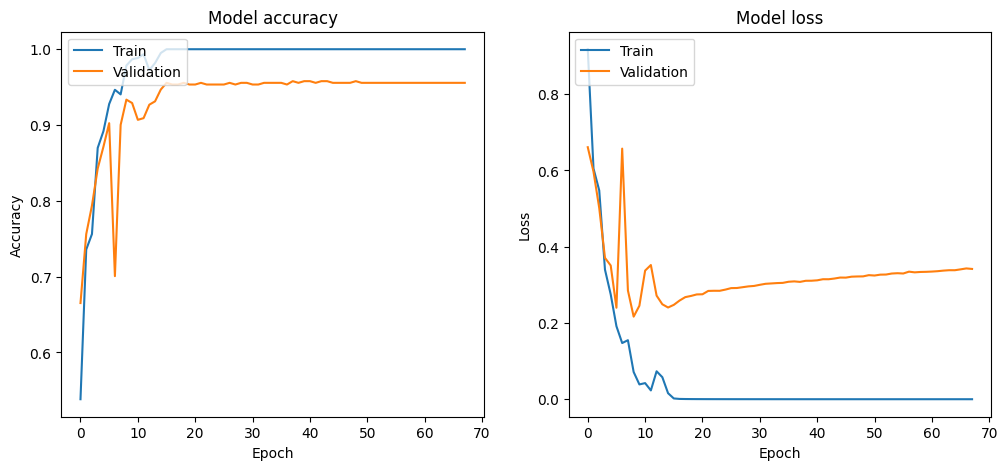

15/15 [==============================] - 0s 6ms/step - loss: 0.3077 - accuracy: 0.9579
Test loss: 0.3076900541782379
Test accuracy: 0.9578713774681091


In [ ]:
modelplot2(history3_4)

best_model3_4 = load_model('model3_4_best_model.h5')
score = best_model3_4.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 5등 (0.2, 0.2, 128)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model3_5_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model3_5 = Sequential()

model3_5.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_5.add(MaxPool2D(2,2))

model3_5.add(Conv2D(64, (3,3), activation = 'relu'))
model3_5.add(MaxPool2D(2,2))

model3_5.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_5.add(Dropout(0.2))

model3_5.add(Flatten())

model3_5.add(Dense(128, activation = 'relu'))

model3_5.add(Dropout(0.2))
model3_5.add(Dense(3, 'softmax'))

model3_5.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history3_5 =  model3_5.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 3s 24ms/step - loss: 0.9246 - accuracy: 0.5323 - val_loss: 0.7752 - val_accuracy: 0.5743
Epoch 2/150
57/57 [==============================] - 1s 20ms/step - loss: 0.7309 - accuracy: 0.6492 - val_loss: 0.7922 - val_accuracy: 0.6541
Epoch 3/150
57/57 [==============================] - 1s 19ms/step - loss: 0.5771 - accuracy: 0.7551 - val_loss: 0.6308 - val_accuracy: 0.7251
Epoch 4/150
57/57 [==============================] - 1s 16ms/step - loss: 0.4422 - accuracy: 0.8213 - val_loss: 0.4939 - val_accuracy: 0.7428
Epoch 5/150
57/57 [==============================] - 1s 14ms/step - loss: 0.3529 - accuracy: 0.8588 - val_loss: 0.3936 - val_accuracy: 0.8271
Epoch 6/150
57/57 [==============================] - 1s 14ms/step - loss: 0.2604 - accuracy: 0.8952 - val_loss: 0.4338 - val_accuracy: 0.8271
Epoch 7/150
57/57 [==============================] - 1s 14ms/step - loss: 0.2222 - accuracy: 0.9106 - val_loss: 0.2964 - val_accuracy: 0.9002
Epoch 

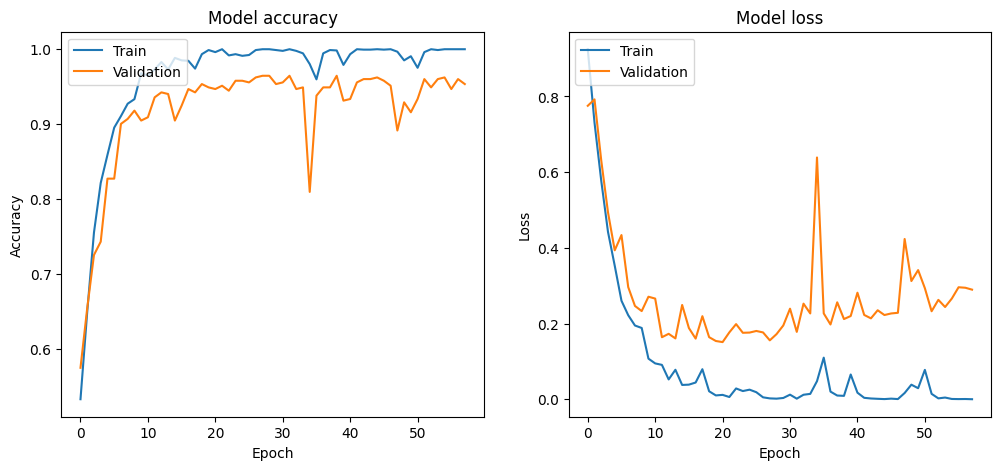

15/15 [==============================] - 0s 8ms/step - loss: 0.1558 - accuracy: 0.9645
Test loss: 0.15582339465618134
Test accuracy: 0.9645232558250427


In [ ]:
modelplot2(history3_5)

best_model3_5 = load_model('model3_5_best_model.h5')
score = best_model3_5.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### (중간) 정리

- 1등 (0.05, 0.1, 64) : 0.1742, 96.67%
- **2등 (0.05, 0.3, 128) : 0.1471, 97.34%**
- 3등 (0.05, 0, 128) : 0.2121, 95.34%
- 4등 (0, 0, 128) : 0.3076, 95.78%
- 5등 (0.2, 0.2, 128) : 0.1558, 96.45%

### 1-4. BatchNormalization

BatchNormalization이 들어간 것으로 다시 한 번 GridSearchCV를 돌려보자. (하이퍼파라미터가 달라질 수도 있으니)

#### parameter 찾기

In [49]:
def build_model2(dropoutRate1, dropoutRate2, units):
  model4 = Sequential()
  model4.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
  model4.add(BatchNormalization()) #추가
  model4.add(MaxPool2D(2,2))

  model4.add(Conv2D(64, (3,3), activation = 'relu'))
  model4.add(BatchNormalization()) #추가
  model4.add(MaxPool2D(2,2))

  model4.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

  model4.add(Dropout(dropoutRate1))

  model4.add(Flatten())

  model4.add(Dense(units, activation = 'relu'))

  model4.add(Dropout(dropoutRate2))
  model4.add(Dense(3, 'softmax'))
  model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model4

In [ ]:
model4 = KerasClassifier(build_fn = build_model2, dropoutRate1 = 0, dropoutRate2 = 0, units = 32)

In [ ]:
parameters = {'dropoutRate1' : [0, 0.05, 0.1, 0.15, 0.2, 0.25],
              'dropoutRate2' : [0, 0.1, 0.2, 0.3],
              'units' : [32, 64, 128]}

In [ ]:
# 파라미터 들에 대해서 최적의 옵션 찾기
grid_search2 = GridSearchCV(estimator = model4,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 2,
                            verbose = 1)

In [ ]:
grid_result2 = grid_search2.fit(train_data, train_labels)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 4s 22ms/step - loss: 0.6887 - accuracy: 0.7612


In [ ]:
# 최고의 파라미터
grid_result2.best_params_

{'dropoutRate1': 0.05, 'dropoutRate2': 0.2, 'units': 64}

In [ ]:
# 10등까지 보기
results2 = pd.DataFrame(grid_result2.cv_results_)
results2 = results2[['param_dropoutRate1', 'param_dropoutRate2', 'param_units', 'rank_test_score']]

results2.sort_values(by = 'rank_test_score', ascending = True).head(10)

,param_dropoutRate1,param_dropoutRate2,param_units,rank_test_score
19,0.05,0.2,64,1
21,0.05,0.3,32,1
64,0.25,0.1,64,3
37,0.15,0,64,4
66,0.25,0.2,32,5
41,0.15,0.1,128,5
65,0.25,0.1,128,7
70,0.25,0.3,64,8
39,0.15,0.1,32,9
42,0.15,0.2,32,9


#### 해당 parameter을 통해 돌려보기 (혹시 모르니 5등까지)

##### 1등 (0.05, 0.2, 64)

In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 30,
    restore_best_weights = False
)

model_checkpoint = ModelCheckpoint(
    filepath = 'model4_1_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_1 = Sequential()

model4_1.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_1.add(BatchNormalization()) #추가
model4_1.add(MaxPool2D(2,2))

model4_1.add(Conv2D(64, (3,3), activation = 'relu'))
model4_1.add(BatchNormalization()) #추가
model4_1.add(MaxPool2D(2,2))

model4_1.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_1.add(Dropout(0.05))

model4_1.add(Flatten())

model4_1.add(Dense(64, activation = 'relu'))

model4_1.add(Dropout(0.2))
model4_1.add(Dense(3, 'softmax'))

model4_1.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_1 =  model4_1.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 6s 22ms/step - loss: 0.7604 - accuracy: 0.7066 - val_loss: 1.3155 - val_accuracy: 0.3525
Epoch 2/150
57/57 [==============================] - 1s 17ms/step - loss: 0.2392 - accuracy: 0.9156 - val_loss: 7.6083 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 19ms/step - loss: 0.1288 - accuracy: 0.9575 - val_loss: 12.4093 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 21ms/step - loss: 0.1371 - accuracy: 0.9526 - val_loss: 8.9685 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1135 - accuracy: 0.9597 - val_loss: 6.8622 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 17ms/step - loss: 0.0721 - accuracy: 0.9741 - val_loss: 6.2720 - val_accuracy: 0.3548
Epoch 7/150
57/57 [==============================] - 1s 23ms/step - loss: 0.0606 - accuracy: 0.9823 - val_loss: 13.1154 - val_accuracy: 0.3525
Epoc

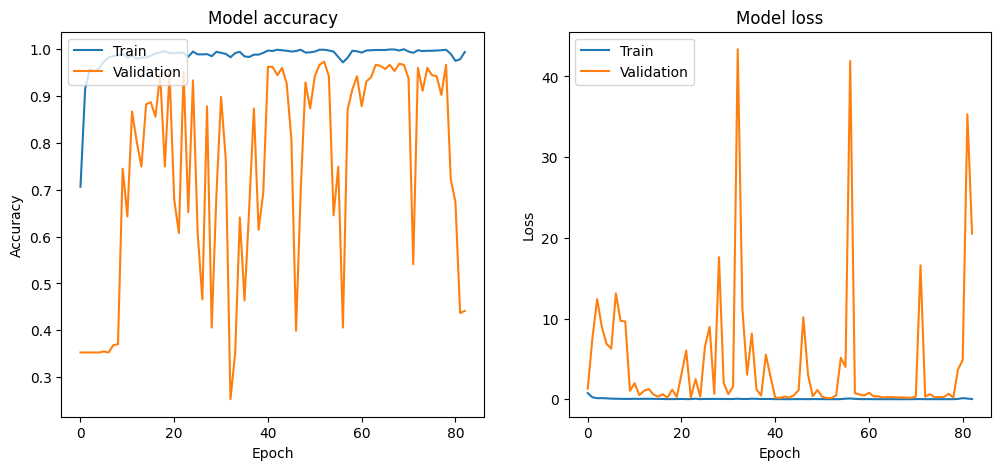

15/15 [==============================] - 0s 7ms/step - loss: 0.1521 - accuracy: 0.9734
Test loss: 0.15205761790275574
Test accuracy: 0.9733924865722656


In [ ]:
modelplot2(history4_1)

best_model4_1 = load_model('model4_1_best_model.h5')
score = best_model4_1.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 1등 (0.05, 0.3, 32)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model4_2_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_2 = Sequential()

model4_2.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_2.add(BatchNormalization()) #추가
model4_2.add(MaxPool2D(2,2))

model4_2.add(Conv2D(64, (3,3), activation = 'relu'))
model4_2.add(BatchNormalization()) #추가
model4_2.add(MaxPool2D(2,2))

model4_2.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_2.add(Dropout(0.05))

model4_2.add(Flatten())

model4_2.add(Dense(32, activation = 'relu'))

model4_2.add(Dropout(0.3))
model4_2.add(Dense(3, 'softmax'))

model4_2.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_2 =  model4_2.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 4s 24ms/step - loss: 0.7012 - accuracy: 0.6950 - val_loss: 1.1364 - val_accuracy: 0.3525
Epoch 2/150
 5/57 [=>............................] - ETA: 0s - loss: 0.3881 - accuracy: 0.8188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 18ms/step - loss: 0.3689 - accuracy: 0.8296 - val_loss: 3.3197 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 18ms/step - loss: 0.3259 - accuracy: 0.8500 - val_loss: 7.9843 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 19ms/step - loss: 0.2527 - accuracy: 0.8902 - val_loss: 10.4351 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1984 - accuracy: 0.9068 - val_loss: 10.5625 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 18ms/step - loss: 0.2031 - accuracy: 0.9106 - val_loss: 12.1227 - val_accuracy: 0.3525
Epoch 7/150
57/57 [==============================] - 1s 20ms/step - loss: 0.1671 - accuracy: 0.9244 - val_loss: 9.9817 - val_accuracy: 0.3525
Epoch 8/150
57/57 [==============================] - 2s 36ms/step - loss: 0.2111 - accuracy: 0.9079 - val_loss: 3.0918 - val_accuracy: 0.5344
Epoch 9/150
57/

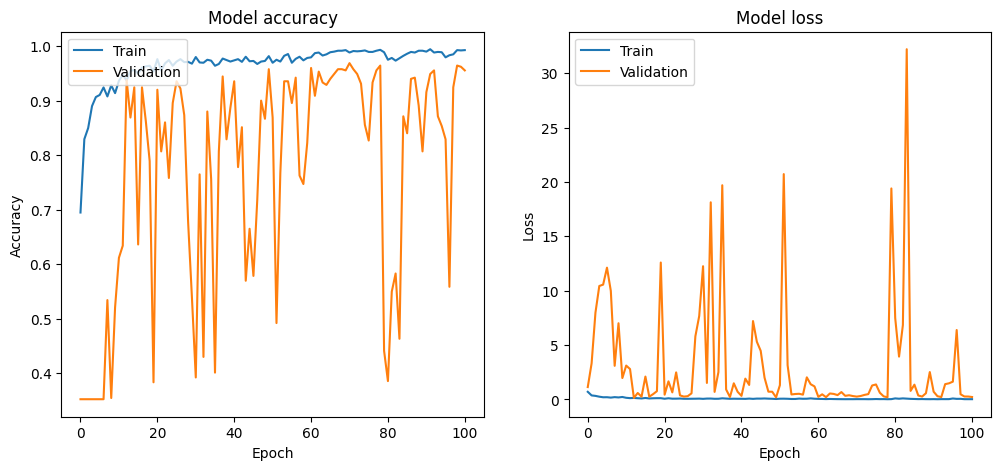

15/15 [==============================] - 0s 7ms/step - loss: 0.2601 - accuracy: 0.9690
Test loss: 0.2600824534893036
Test accuracy: 0.9689579010009766


In [ ]:
modelplot2(history4_2)

best_model4_2 = load_model('model4_2_best_model.h5')
score = best_model4_2.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 3등 (0.25, 0.1, 64)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model4_3_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_3 = Sequential()

model4_3.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_3.add(BatchNormalization()) #추가
model4_3.add(MaxPool2D(2,2))

model4_3.add(Conv2D(64, (3,3), activation = 'relu'))
model4_3.add(BatchNormalization()) #추가
model4_3.add(MaxPool2D(2,2))

model4_3.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_3.add(Dropout(0.25))

model4_3.add(Flatten())

model4_3.add(Dense(64, activation = 'relu'))

model4_3.add(Dropout(0.1))
model4_3.add(Dense(3, 'softmax'))

model4_3.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_3 =  model4_3.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 5s 30ms/step - loss: 0.9632 - accuracy: 0.7137 - val_loss: 1.4960 - val_accuracy: 0.3525
Epoch 2/150
 1/57 [..............................] - ETA: 2s - loss: 0.3787 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 20ms/step - loss: 0.2589 - accuracy: 0.8969 - val_loss: 6.0335 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1985 - accuracy: 0.9162 - val_loss: 9.3891 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1270 - accuracy: 0.9509 - val_loss: 15.5701 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 17ms/step - loss: 0.0757 - accuracy: 0.9713 - val_loss: 11.5836 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 19ms/step - loss: 0.0939 - accuracy: 0.9641 - val_loss: 12.5855 - val_accuracy: 0.3548
Epoch 7/150
57/57 [==============================] - 1s 18ms/step - loss: 0.0693 - accuracy: 0.9746 - val_loss: 5.6374 - val_accuracy: 0.3814
Epoch 8/150
57/57 [==============================] - 1s 19ms/step - loss: 0.0609 - accuracy: 0.9763 - val_loss: 2.5319 - val_accuracy: 0.5011
Epoch 9/150
57/

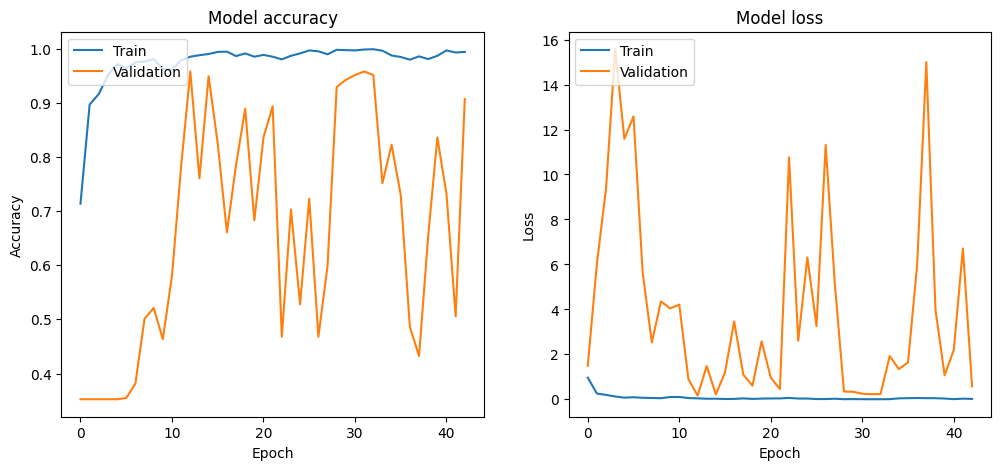

15/15 [==============================] - 0s 9ms/step - loss: 0.1662 - accuracy: 0.9579
Test loss: 0.16619093716144562
Test accuracy: 0.9578713774681091


In [ ]:
modelplot2(history4_3)

best_model4_3 = load_model('model4_3_best_model.h5')
score = best_model4_3.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 4등 (0.15, 0. 64)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model4_4_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_4 = Sequential()

model4_4.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_4.add(BatchNormalization()) #추가
model4_4.add(MaxPool2D(2,2))

model4_4.add(Conv2D(64, (3,3), activation = 'relu'))
model4_4.add(BatchNormalization()) #추가
model4_4.add(MaxPool2D(2,2))

model4_4.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_4.add(Dropout(0.15))

model4_4.add(Flatten())

model4_4.add(Dense(64, activation = 'relu'))

model4_4.add(Dropout(0))
model4_4.add(Dense(3, 'softmax'))

model4_4.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_4 =  model4_4.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 4s 22ms/step - loss: 0.7168 - accuracy: 0.7375 - val_loss: 2.0091 - val_accuracy: 0.3525
Epoch 2/150
 5/57 [=>............................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 17ms/step - loss: 0.2596 - accuracy: 0.8941 - val_loss: 8.0199 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 18ms/step - loss: 0.1627 - accuracy: 0.9377 - val_loss: 10.5525 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 18ms/step - loss: 0.0690 - accuracy: 0.9807 - val_loss: 14.6722 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 17ms/step - loss: 0.0521 - accuracy: 0.9857 - val_loss: 18.4725 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 17ms/step - loss: 0.0563 - accuracy: 0.9835 - val_loss: 17.5286 - val_accuracy: 0.3525
Epoch 7/150
57/57 [==============================] - 1s 19ms/step - loss: 0.1074 - accuracy: 0.9653 - val_loss: 9.1245 - val_accuracy: 0.3548
Epoch 8/150
57/57 [==============================] - 1s 19ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 5.9769 - val_accuracy: 0.4102
Epoch 9/150
57

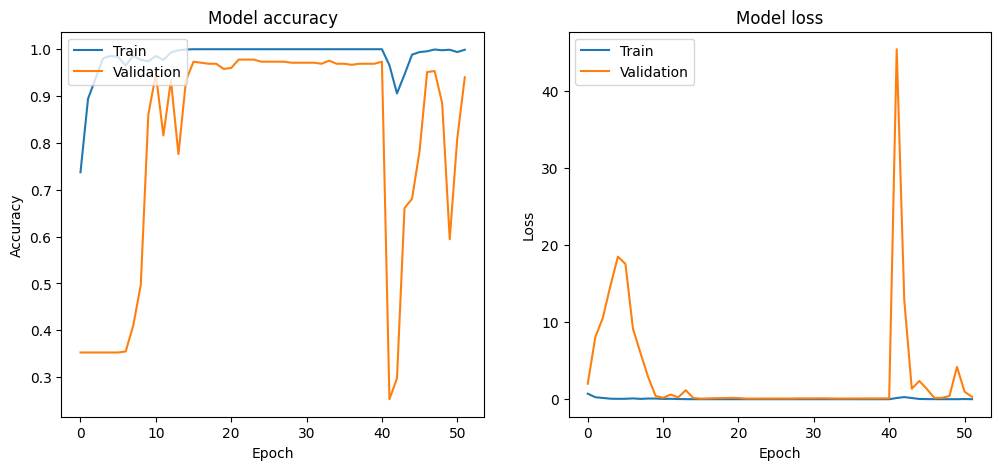

15/15 [==============================] - 0s 7ms/step - loss: 0.0830 - accuracy: 0.9778
Test loss: 0.08297251909971237
Test accuracy: 0.9778270721435547


In [ ]:
modelplot2(history4_4)

best_model4_4 = load_model('model4_4_best_model.h5')
score = best_model4_4.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 5등 (0.25, 0.2, 32)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model4_5_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_5 = Sequential()

model4_5.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_5.add(BatchNormalization()) #추가
model4_5.add(MaxPool2D(2,2))

model4_5.add(Conv2D(64, (3,3), activation = 'relu'))
model4_5.add(BatchNormalization()) #추가
model4_5.add(MaxPool2D(2,2))

model4_5.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_5.add(Dropout(0.25))

model4_5.add(Flatten())

model4_5.add(Dense(32, activation = 'relu'))

model4_5.add(Dropout(0.2))
model4_5.add(Dense(3, 'softmax'))

model4_5.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_5 =  model4_5.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 3s 22ms/step - loss: 0.6265 - accuracy: 0.7237 - val_loss: 2.2762 - val_accuracy: 0.3525
Epoch 2/150
57/57 [==============================] - 1s 17ms/step - loss: 0.3635 - accuracy: 0.8389 - val_loss: 11.0307 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 17ms/step - loss: 0.2805 - accuracy: 0.8836 - val_loss: 14.5229 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 17ms/step - loss: 0.2041 - accuracy: 0.9007 - val_loss: 17.2675 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1473 - accuracy: 0.9355 - val_loss: 16.6928 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 19ms/step - loss: 0.1461 - accuracy: 0.9448 - val_loss: 9.0595 - val_accuracy: 0.3636
Epoch 7/150
57/57 [==============================] - 1s 24ms/step - loss: 0.1565 - accuracy: 0.9388 - val_loss: 6.3459 - val_accuracy: 0.3659
Ep

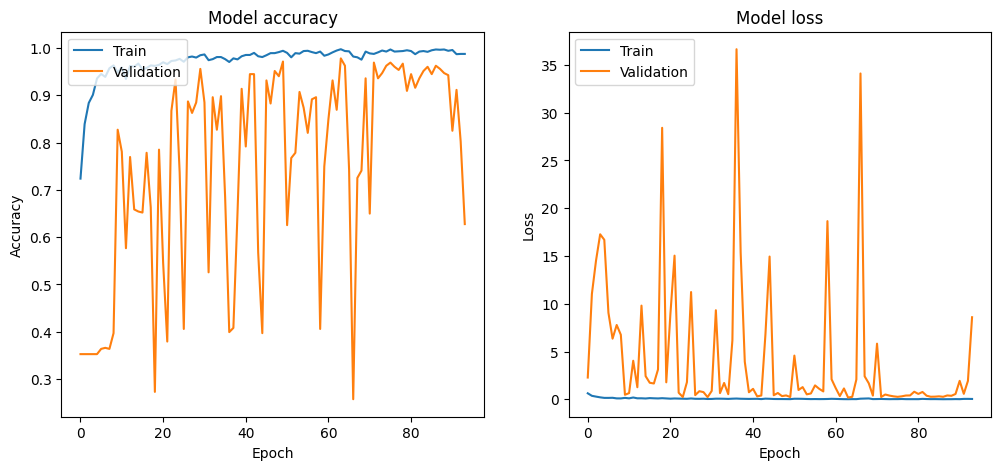

15/15 [==============================] - 0s 6ms/step - loss: 0.1821 - accuracy: 0.9778
Test loss: 0.18205611407756805
Test accuracy: 0.9778270721435547


In [ ]:
modelplot2(history4_5)

best_model4_5 = load_model('model4_5_best_model.h5')
score = best_model4_5.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### 5등 (0.15, 0.1, 128)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = 'model4_6_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
model4_6 = Sequential()

model4_6.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_6.add(BatchNormalization()) #추가
model4_6.add(MaxPool2D(2,2))

model4_6.add(Conv2D(64, (3,3), activation = 'relu'))
model4_6.add(BatchNormalization()) #추가
model4_6.add(MaxPool2D(2,2))

model4_6.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_6.add(Dropout(0.15))

model4_6.add(Flatten())

model4_6.add(Dense(128, activation = 'relu'))

model4_6.add(Dropout(0.1))
model4_6.add(Dense(3, 'softmax'))

model4_6.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

history4_6 =  model4_6.fit(train_generator,
                     epochs=150,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/150
57/57 [==============================] - 4s 30ms/step - loss: 0.9524 - accuracy: 0.7143 - val_loss: 2.3543 - val_accuracy: 0.3525
Epoch 2/150
57/57 [==============================] - 1s 18ms/step - loss: 0.2103 - accuracy: 0.9123 - val_loss: 9.8704 - val_accuracy: 0.3525
Epoch 3/150
57/57 [==============================] - 1s 17ms/step - loss: 0.1402 - accuracy: 0.9476 - val_loss: 8.8684 - val_accuracy: 0.3525
Epoch 4/150
57/57 [==============================] - 1s 19ms/step - loss: 0.0672 - accuracy: 0.9818 - val_loss: 18.5022 - val_accuracy: 0.3525
Epoch 5/150
57/57 [==============================] - 1s 19ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 14.6937 - val_accuracy: 0.3525
Epoch 6/150
57/57 [==============================] - 1s 18ms/step - loss: 0.0401 - accuracy: 0.9890 - val_loss: 19.4681 - val_accuracy: 0.3525
Epoch 7/150
57/57 [==============================] - 1s 20ms/step - loss: 0.0467 - accuracy: 0.9879 - val_loss: 10.2924 - val_accuracy: 0.3614
Ep

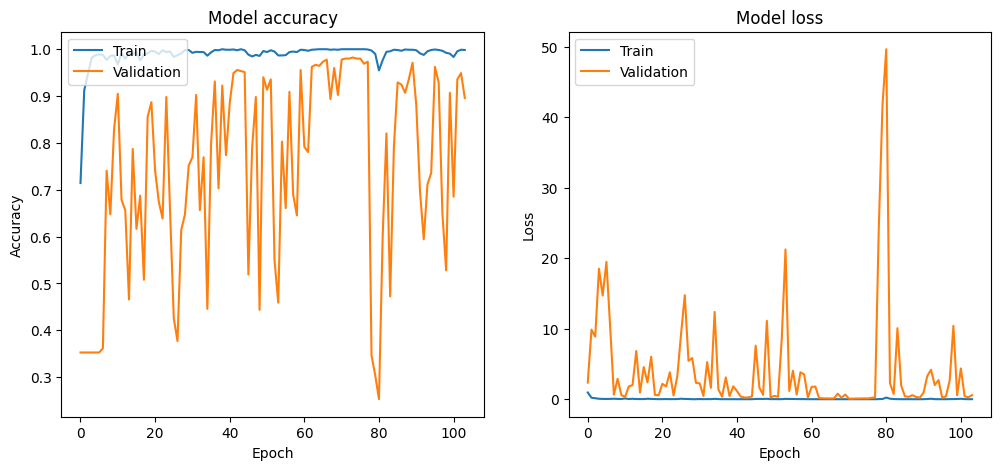

15/15 [==============================] - 0s 6ms/step - loss: 0.1040 - accuracy: 0.9823
Test loss: 0.10396809875965118
Test accuracy: 0.9822616577148438


In [ ]:
modelplot2(history4_6)

best_model4_6 = load_model('model4_6_best_model.h5')
score = best_model4_6.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

##### (중간) 정리
- 1등 (0.05, 0.2, 64) : 0.1521, 97.34%
- 1등 (0.05, 0.3, 32) : 0.2601, 96.90%
- 3등 (0.25, 0.1, 64) : 0.1662, 95.79%
- 4등 (0.15, 0, 64) : 0.0830, 97.78%
- 5등 (0.25, 0.2, 32) : 0.1820, 97.78%
- **5등 (0.15, 0.1, 128) : 0.1039, 98.23%**


### 현재 발전 정도

- 가장 높은 것 : BatchNormalization 존재, (0.15, 0.1, 128) : 98.23%
- 기본적인 CNN : 94.46%

## **5.이미지 증강**

    - train 데이터 증강

### 사진 하나 예시로 보기

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 제너레이터 생성
sample_generator = ImageDataGenerator(
        horizontal_flip = True,
        rotation_range= 30,
        zoom_range = 0.2
        )

In [ ]:
#augmentation이 적용된 image들을 시각화 해주는 함수
def show_aug_image(image, generator, n_images=4):
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
    generator.fit(image_batch)
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))

    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)

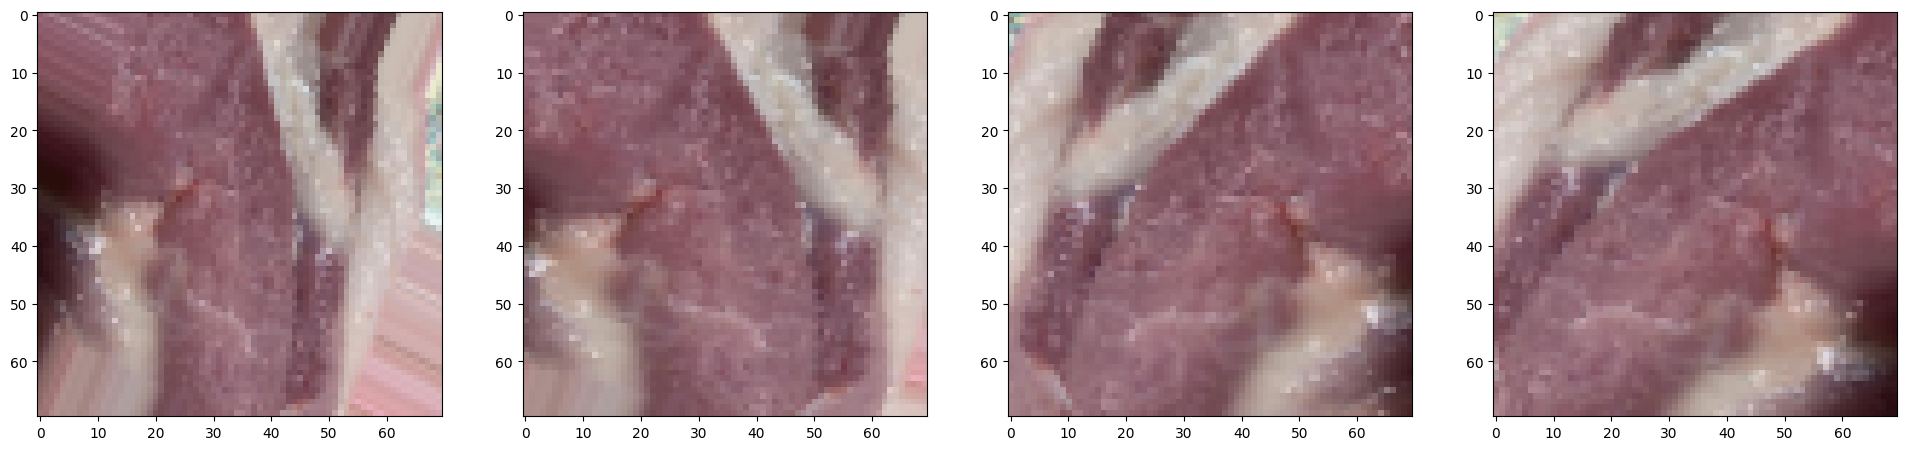

In [ ]:
#이미지 제너레이터를 이용한 데이터 증강 결과
show_aug_image(train_data[0], sample_generator, n_images=4)

### Aug_train, aug_test data 만들기

In [ ]:
# 학습 데이터 증강하기
aug_imagegen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,   # randomly flip images
        rescale=1/255,
        )

aug_train_dataset = aug_imagegen.flow(test_data, test_labels, batch_size = 32)

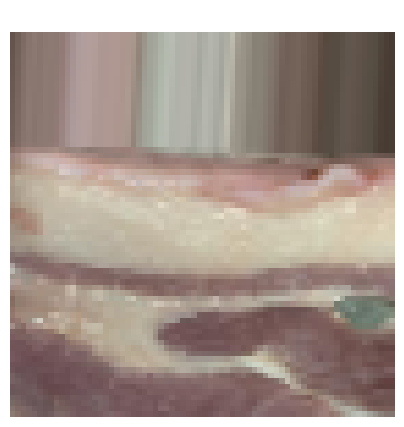

Image shape: (70, 70, 3)
Label: [1. 0. 0.]


In [ ]:
batch_data, batch_labels = next(aug_train_dataset)

# 예시 사진 보기
sample_image = batch_data[19]
sample_label = batch_labels[19]


generateImg(sample_image*255)
print("Image shape:", sample_image.shape)
print("Label:", sample_label)

In [ ]:
aug_test_dataset = aug_imagegen.flow(test_data, test_labels, batch_size = 32)

## 6.모델 학습 및 평가 - 이미지 증강 후

    - CNN 모델 정의 및 학습
    - 모델의 과적합 여부 그래프 등으로 확인하기
    - test 데이터 기반 모델 평가
  
  - 1-3, 1-4에서 평가를 따로 진행했던 11개 모델중 각각 성적이 제일 좋은 1개씩 뽑아
  - 총 2개의 모델에 대해서만 변화폭을 살펴본다.

### 2-1. BatchNormalization이 없던 모델

In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 200,
    restore_best_weights = False
)

model_checkpoint = ModelCheckpoint(
    filepath = 'model3_2_aug_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
# 모델 만들기
model3_2_aug = Sequential()

model3_2_aug.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model3_2_aug.add(MaxPool2D(2,2))

model3_2_aug.add(Conv2D(64, (3,3), activation = 'relu'))
model3_2_aug.add(MaxPool2D(2,2))

model3_2_aug.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model3_2_aug.add(Dropout(0.05))

model3_2_aug.add(Flatten())

model3_2_aug.add(Dense(128, activation = 'relu'))

model3_2_aug.add(Dropout(0.3))
model3_2_aug.add(Dense(3, 'softmax'))

# 컴파일
model3_2_aug.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

# fit
history3_2_aug =  model3_2_aug.fit(train_generator,
                     epochs=1000,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/1000
57/57 [==============================] - 3s 21ms/step - loss: 1.0580 - accuracy: 0.4120 - val_loss: 0.9412 - val_accuracy: 0.5698
Epoch 2/1000
57/57 [==============================] - 1s 16ms/step - loss: 0.8189 - accuracy: 0.6111 - val_loss: 0.7830 - val_accuracy: 0.6563
Epoch 3/1000
57/57 [==============================] - 1s 17ms/step - loss: 0.6116 - accuracy: 0.7181 - val_loss: 0.6104 - val_accuracy: 0.7494
Epoch 4/1000
57/57 [==============================] - 1s 16ms/step - loss: 0.4759 - accuracy: 0.7816 - val_loss: 0.4973 - val_accuracy: 0.7672
Epoch 5/1000
57/57 [==============================] - 1s 13ms/step - loss: 0.3999 - accuracy: 0.8279 - val_loss: 0.4190 - val_accuracy: 0.8093
Epoch 6/1000
57/57 [==============================] - 1s 14ms/step - loss: 0.2982 - accuracy: 0.8787 - val_loss: 0.4024 - val_accuracy: 0.8404
Epoch 7/1000
57/57 [==============================] - 1s 13ms/step - loss: 0.2193 - accuracy: 0.9200 - val_loss: 0.2950 - val_accuracy: 0.8936

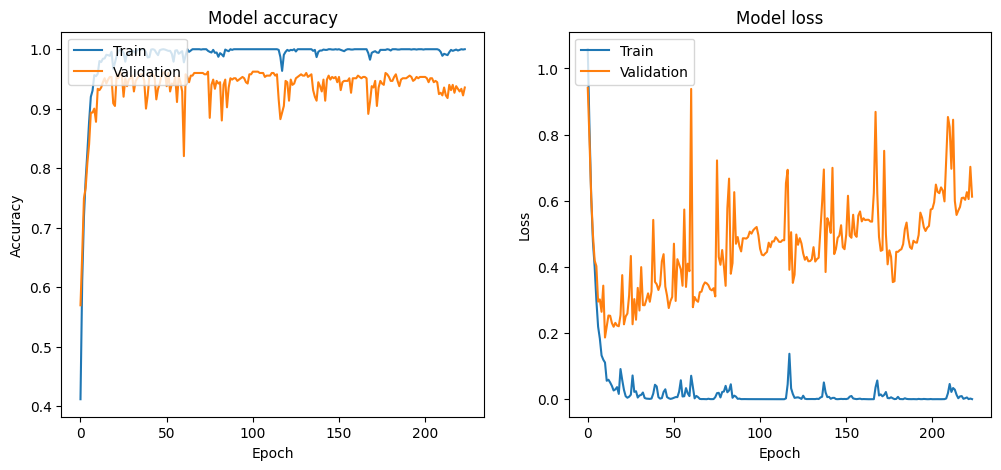

15/15 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.9690
Test loss: 0.18845118582248688
Test accuracy: 0.9689579010009766


In [ ]:
modelplot2(history3_2_aug) # 그림 보여주기

best_model3_2_aug = load_model('model3_2_aug_best_model.h5')
score = best_model3_2_aug.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1]) #평가

- Augmentation이 없던 모델 :  0.1470, 97.34%
- Augmentation이 있는 모델 : 0.1885, 96.90%

### 2-2. BatchNormalization이 있던 모델



In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience = 200,
    restore_best_weights = False
)

model_checkpoint = ModelCheckpoint(
    filepath = 'model4_6_aug_best_model.h5',
    monitor = 'val_accuracy',
    save_best_only = True
)

In [ ]:
# 모델 만들기
model4_6_aug = Sequential()

model4_6_aug.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (70,70,3)))
model4_6_aug.add(BatchNormalization()) #추가
model4_6_aug.add(MaxPool2D(2,2))

model4_6_aug.add(Conv2D(64, (3,3), activation = 'relu'))
model4_6_aug.add(BatchNormalization()) #추가
model4_6_aug.add(MaxPool2D(2,2))

model4_6_aug.add(Conv2D(64, (3,3), activation = 'relu')) # RAM 사용량 줄이기...

model4_6_aug.add(Dropout(0.15))

model4_6_aug.add(Flatten())

model4_6_aug.add(Dense(128, activation = 'relu'))

model4_6_aug.add(Dropout(0.1))
model4_6_aug.add(Dense(3, 'softmax'))

# 컴파일
model4_6_aug.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

# fit
history4_6_aug =  model4_6_aug.fit(train_generator,
                     epochs=1000,
                     verbose=1,
                     validation_data = test_generator,
                     callbacks=[custom_early_stopping, model_checkpoint])

Epoch 1/1000
57/57 [==============================] - 3s 27ms/step - loss: 1.0684 - accuracy: 0.6889 - val_loss: 2.2692 - val_accuracy: 0.3525
Epoch 2/1000
57/57 [==============================] - 1s 21ms/step - loss: 0.3307 - accuracy: 0.8737 - val_loss: 8.1551 - val_accuracy: 0.3525
Epoch 3/1000
57/57 [==============================] - 1s 21ms/step - loss: 0.2008 - accuracy: 0.9195 - val_loss: 14.8315 - val_accuracy: 0.3525
Epoch 4/1000
57/57 [==============================] - 1s 21ms/step - loss: 0.1047 - accuracy: 0.9675 - val_loss: 23.7120 - val_accuracy: 0.3525
Epoch 5/1000
57/57 [==============================] - 1s 18ms/step - loss: 0.0812 - accuracy: 0.9713 - val_loss: 16.7756 - val_accuracy: 0.3525
Epoch 6/1000
57/57 [==============================] - 1s 17ms/step - loss: 0.0589 - accuracy: 0.9779 - val_loss: 16.9507 - val_accuracy: 0.3525
Epoch 7/1000
57/57 [==============================] - 1s 18ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 18.8366 - val_accuracy: 0

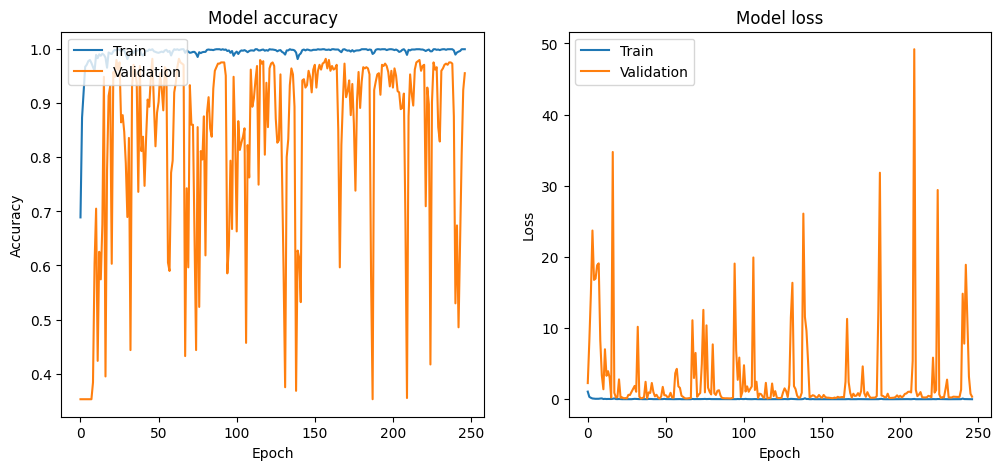

15/15 [==============================] - 0s 9ms/step - loss: 0.0782 - accuracy: 0.9823
Test loss: 0.07820728421211243
Test accuracy: 0.9822616577148438


In [ ]:
modelplot2(history4_6_aug)

best_model4_6_aug = load_model('model4_6_aug_best_model.h5')
score = best_model4_6_aug.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

- Augmentation이 없던 모델 : 98.23%
- Augmentation이 있는 모델 : 98.23%
- test loss 같은 경우 현재 모델이 더 적다. (0.1039, 0.0782)

## 7.Ensemble

    - voting ensemble에 대해서 시도

### 3-1. voting ensemble
  - 사용할 13개의 모델에 대해서 서로 상반된 평가를 보이는 사진에 대해서 check해보자.

#### 유효성 check

만약 어떤 사진 A에 대해 모두 다 같이 맞고 B에 대해서는 모두 틀린다면, 궂이 ensemble을 할 필요가 없을 것이다. 이 코드들은 그 유효성, 즉 틀린 문제가 모델마다 서로 다른지를 체크하기 위한 것이다.

In [160]:
model_list = []

for i in range(5):
    model_list.append(load_model(f'/content/model3_{i+1}_best_model.h5'))

for i in range(6):
    model_list.append(load_model(f'/content/model4_{i+1}_best_model.h5'))

model_list.append(load_model(f'/content/model3_2_aug_best_model.h5'))
model_list.append(load_model(f'/content/model4_6_aug_best_model.h5'))

In [220]:
result_list = []

test_generator = datagen.flow(test_data, test_labels, batch_size = 32, seed = 42, shuffle = False)

for model in model_list:
  result = model.predict(test_generator)

  #최댓값은 1로, 나머지는 0으로
  maxidx = np.argmax(result, axis = 1)
  result = np.zeros((len(result), 3))
  for i in range(len(result)):
    result[i][maxidx[i]] = 1

  result_list.append(result)

result_array = np.array(result_list)

15/15 [==============================] - 0s 5ms/step


In [221]:
result

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

53
[[0. 1. 0.]
 [1. 0. 0.]]


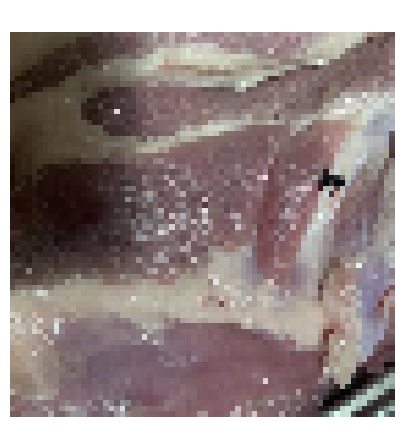

[0. 1. 0.]


In [226]:
opposing_predictions = []

for i in range(result_array.shape[1]):
  predictions_for_sample = result_array[:, i, :]
  unique_predictions = np.unique(predictions_for_sample, axis=0)

  if unique_predictions.shape[0] > 1:
        image_number = i
        opposing_predictions.append((image_number, unique_predictions))

print(len(opposing_predictions)) # 총 개수
print(opposing_predictions[10][1]) # 해당 사진에 대해 모델들은 어떻게 예측했는가?
generateImg(test_data[opposing_predictions[10][0]]) # 사진 보여주기
print(test_labels[opposing_predictions[10][0]]) # 정답 label

13개의 모델에 대해, 적어도 하나의 모델이 다른 예측 결과를 보여준 이미지는 총 53개이다. 상반된 결과를 가지고 있는 사진들에 대해 voting ensemble을 진행하면 모델의 성능을 향상시킬 수 있을 것으로 기대된다.

#### voting ensemble 코드 짜기 (soft)

정말 다양한 모델을 시도해 봤다.

- mlxtend.classifier : EnsembleVoteClassifier
    - scikeras.wrappers로 모델을 감쌀 경우 알 수 없는 버그들이 발생. (공식 문서에도 기재되어 있는 오류)
    - predict_proba 함수가 없어 결론 도출이 불가.
- sklearn.ensemble : VotingClassifier
    - (fit_best_param = False) method가 없어서 다시 한 번 학습을 시켜야 했음.
    - 또 classifier에서 확률을 도출하는 것이 문제가 됌.

- 결국 남아있는 유일한 방법, 직접 VoteEnsembleClassifier을 짤 수 밖에 없었음 ㅠㅠㅠㅠㅠ
    - voting 방법은 soft
    - 내부에서 다시 학습을 시키지는 않을 것.
    

In [193]:
class VoteEnsembleClassifier():

  def __init__(self, model_list):
    self.model_list = model_list

  # 여기서는 test_data, test_labes에 대해 prediction matrix를 추출한다는 의미
  def fit(self, test_data, test_labels):
    result_list = []

    for model in self.model_list:
      test_generator = datagen.flow(test_data, test_labels, batch_size = 32, shuffle = False)
      result = model.predict(test_generator)
      result_list.append(result)

    result_array = np.array(result_list)

    prediction = []

    for i in range(result_array.shape[1]):
      predictions_for_sample = result_array[:, i, :]
      prediction.append(np.mean(predictions_for_sample, axis = 0))

    self.prediction = prediction

  def categorical_crossentropy(self, y_true, y_pred):
    epsilon = 1e-15  # 아주 작은 값, 로그의 분모가 0이 되는 것을 방지하기 위해 추가됨
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # 예측값을 0에서 1 사이로 클리핑
    N = y_pred.shape[0]  # 배치 크기

    # 교차 엔트로피 계산
    cross_entropy = -np.sum(y_true * np.log(y_pred + epsilon)) / N

    return cross_entropy

  def accuracy(self, y_true, y_pred):
    # 각 예측에서 가장 높은 확률을 갖는 클래스 선택
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # 정확하게 예측된 비율 계산
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples

    return accuracy

  # loss와 정확도 표시
  def show_accuracy(self, imglabel):
    print(f'loss : {self.categorical_crossentropy(imglabel, self.prediction)}, accuracy : {self.accuracy(imglabel, self.prediction)}')

  # test_data(4차원)이 들어오면 이를 예측.
  def predict(self, test_data):
    result_list = []

    for model in self.model_list:
      index = np.zeros(len(test_data))
      test_generator = datagen.flow(test_data, index, batch_size = 32, shuffle = False)
      result = model.predict(test_generator)
      result_list.append(result)

    result_array = np.array(result_list)

    prediction = []

    for i in range(result_array.shape[1]):
      predictions_for_sample = result_array[:, i, :]
      prediction.append(np.mean(predictions_for_sample, axis = 0))

    self.prediction = prediction
    print(prediction)

In [170]:
# 잘 만들었는지 평가하기 위해 이미 loss와 accuracy를 알고 있는 모델을 대입
best_model_4_5 = load_model('/content/model4_5_best_model.h5')
voteC = VoteEnsembleClassifier([best_model_4_5])
voteC.fit(test_data, test_labels)
voteC.show_accuracy(test_labels)

15/15 [==============================] - 0s 10ms/step
loss : 0.1820561140445278, accuracy : 0.9778270509977827


원래 사용하던 모델과 같은 값을 나오는 걸 보니 코딩을 잘 한 거 같다!

In [161]:
model_list = []

for i in range(5):
    model_list.append(load_model(f'/content/model3_{i+1}_best_model.h5'))

for i in range(6):
    model_list.append(load_model(f'/content/model4_{i+1}_best_model.h5'))

model_list.append(load_model(f'/content/model3_2_aug_best_model.h5'))
model_list.append(load_model(f'/content/model4_6_aug_best_model.h5'))

In [197]:
# 본격적으로 모든 모델을 포함하는 새로운 voting ensemble.
voteC2 = VoteEnsembleClassifier(model_list)
voteC2.fit(test_data, test_labels)
voteC2.show_accuracy(test_labels)

15/15 [==============================] - 0s 8ms/step
loss : 0.052256886552019814, accuracy : 0.9822616407982262


성공적!
accuracy는 같지만, loss 값이 더욱 획기적으로 감소했다!


## 7.최종 정리

- 가장 처음 모델의 경우 : 0.2750, 94.46%
- 이미지 증강이 없는 모델 중 가장 발달된 모델의 경우 : 0.1039, 98.23%
- 이미지 증강이 있는 모델 중 가장 발달된 모델의 경우 : 0.0782, 98.23%
- **voting ensemble 모델 : 0.0522, 98.23%** ✅

다양한 방법을 사용할 수록, 모델의 성능이 전체적으로 발전해 나가는 것 같다.

In [203]:
# 가장 좋은 모델에 예시 사진들을 넣어보기
from keras.utils import load_img, img_to_array

def exampleimg(filepath):
  imgsample = load_img(filepath, target_size = (70,70,3))
  imgarray = img_to_array(imgsample)

  generateImg(imgarray)

  imgarray = np.expand_dims(imgarray, axis = 0)

  predictions = voteC2.predict(imgarray/255)
  print(predictions)

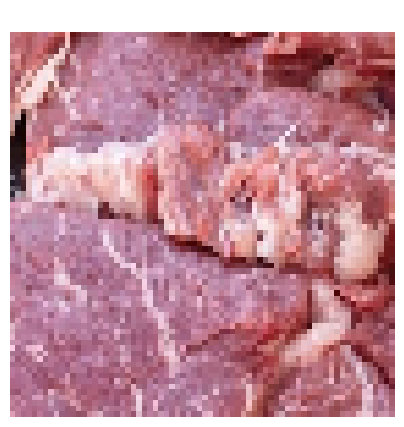

1/1 [==============================] - 0s 149ms/step
[array([7.6922290e-02, 9.2307770e-01, 1.8804752e-12], dtype=float32)]
None


In [204]:
exampleimg('/content/example1.jpg')

약간 비관적으로 엄격하게 평가하는 거 같긴 하다...